# 🧪 Batch Size Optimization

- **Fixed Batch Size**: Set to **16**, based on empirical evidence for optimal performance.
- **Gradient Accumulation**: Performed over **2 steps**, resulting in an **effective batch size of 32** without increasing memory usage.
- **Learning Rate Warmup**: Applied during the **first 3 epochs** to stabilize early training dynamics.

---

# 🎯 Minority Class Boost

- **Increased Oversampling**: Raised to **6×** for graphs containing a high proportion of minority-class utterances.
- **Feature Perturbation Tuning**: Reduced scale from **0.1 → 0.08** for subtler augmentation, improving realism.
- **Aggressive Sampling Strategy**: Sample count determined by `1 + 2 × minority_count` to dynamically adapt to minority density.

---

# ⚙️ Training Stabilization

- **Gradient Clipping**: Applied at **0.5** to prevent gradient explosion and enhance convergence stability.
- **Auxiliary Loss Weighting**: Maintained a reduced auxiliary loss contribution at **0.1**, ensuring focus on the main objective.
- **Regularization**:
  - **Dropout**: Set to **0.7**
  - **Edge Dropout**: Set to **0.2**  
  These values provide a strong regularization balance without excessive information loss.

---

# 📊 Performance Validation

- **Multi-Seed Evaluation**: Trained and evaluated across **5 different random seeds** for robust and repeatable results.
- **Confidence Interval Reporting**: Included **95% confidence intervals** to quantify performance stability.
- **Detailed Metrics**: Reported **per-class performance metrics**, enabling fine-grained analysis, especially for minority classes.

---

In [1]:
# MUST be at the very top before any imports
import os
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cu118.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00


ENHANCED EMOTION CLASSIFICATION (Seed 1/5)

Loading data...
Computing class weights...
Class distribution: [6434 1636  358 1002 2308  361 1607]
Class weights: tensor([0.3043, 1.1968, 5.4693, 1.9541, 0.8484, 5.4238, 1.2184])

Creating speaker mapping...
Found 304 unique speakers

Building graphs with enhanced minority oversampling...

Graph Statistics:
Train graphs: 3947 (with enhanced oversampling)
Dev graphs: 114
Test graphs: 280

Model initialized (Seed 42):
Input dimension: 256
Hidden dimension: 128
Number of speakers: 304
Device: cuda

STARTING TRAINING


Epoch 1/60: 100%|██████████| 247/247 [00:10<00:00, 24.18it/s]



Saved new best model at epoch 1 with Val F1: 0.3572

Epoch 1 Summary (10.5s):
Train Loss: 2.0085 | Acc: 0.3192 | F1: 0.2955
Val Loss:   2.0898 | Acc: 0.4251 | F1: 0.3572
Learning Rate: 0.0000167


Epoch 2/60: 100%|██████████| 247/247 [00:08<00:00, 27.68it/s]



Saved new best model at epoch 2 with Val F1: 0.4158

Epoch 2 Summary (9.2s):
Train Loss: 1.7481 | Acc: 0.4050 | F1: 0.3859
Val Loss:   2.0913 | Acc: 0.4413 | F1: 0.4158
Learning Rate: 0.0000333


Epoch 3/60: 100%|██████████| 247/247 [00:09<00:00, 27.10it/s]



Saved new best model at epoch 3 with Val F1: 0.5691

Epoch 3 Summary (9.4s):
Train Loss: 1.5640 | Acc: 0.4940 | F1: 0.4891
Val Loss:   2.0661 | Acc: 0.5722 | F1: 0.5691
Learning Rate: 0.0000500


Epoch 4/60: 100%|██████████| 247/247 [00:09<00:00, 27.34it/s]



Saved new best model at epoch 4 with Val F1: 0.5983

Epoch 4 Summary (9.3s):
Train Loss: 1.3835 | Acc: 0.5942 | F1: 0.5963
Val Loss:   2.1083 | Acc: 0.5966 | F1: 0.5983
Learning Rate: 0.0000500


Epoch 5/60: 100%|██████████| 247/247 [00:08<00:00, 27.47it/s]



Saved new best model at epoch 5 with Val F1: 0.6072

Epoch 5 Summary (9.2s):
Train Loss: 1.2933 | Acc: 0.6399 | F1: 0.6423
Val Loss:   2.1583 | Acc: 0.6101 | F1: 0.6072
Learning Rate: 0.0000500


Epoch 6/60: 100%|██████████| 247/247 [00:09<00:00, 27.19it/s]



Saved new best model at epoch 6 with Val F1: 0.6363

Epoch 6 Summary (9.3s):
Train Loss: 1.2110 | Acc: 0.6729 | F1: 0.6759
Val Loss:   2.2919 | Acc: 0.6381 | F1: 0.6363
Learning Rate: 0.0000500


Epoch 7/60: 100%|██████████| 247/247 [00:08<00:00, 28.38it/s]



Saved new best model at epoch 7 with Val F1: 0.6547

Epoch 7 Summary (9.0s):
Train Loss: 1.1394 | Acc: 0.7015 | F1: 0.7049
Val Loss:   2.0741 | Acc: 0.6453 | F1: 0.6547
Learning Rate: 0.0000500


Epoch 8/60: 100%|██████████| 247/247 [00:08<00:00, 28.84it/s]



Saved new best model at epoch 8 with Val F1: 0.6695

Epoch 8 Summary (8.8s):
Train Loss: 1.0897 | Acc: 0.7164 | F1: 0.7203
Val Loss:   2.2633 | Acc: 0.6661 | F1: 0.6695
Learning Rate: 0.0000500


Epoch 9/60: 100%|██████████| 247/247 [00:08<00:00, 28.93it/s]



Epoch 9 Summary (8.8s):
Train Loss: 1.0522 | Acc: 0.7300 | F1: 0.7341
Val Loss:   2.1187 | Acc: 0.6625 | F1: 0.6693
Learning Rate: 0.0000500


Epoch 10/60: 100%|██████████| 247/247 [00:08<00:00, 28.59it/s]



Saved new best model at epoch 10 with Val F1: 0.6767

Epoch 10 Summary (8.9s):
Train Loss: 1.0151 | Acc: 0.7399 | F1: 0.7439
Val Loss:   2.0829 | Acc: 0.6643 | F1: 0.6767
Learning Rate: 0.0000500


Epoch 11/60: 100%|██████████| 247/247 [00:08<00:00, 28.88it/s]



Saved new best model at epoch 11 with Val F1: 0.6790

Epoch 11 Summary (8.8s):
Train Loss: 0.9864 | Acc: 0.7506 | F1: 0.7545
Val Loss:   2.2483 | Acc: 0.6715 | F1: 0.6790
Learning Rate: 0.0000500


Epoch 12/60: 100%|██████████| 247/247 [00:08<00:00, 28.83it/s]



Saved new best model at epoch 12 with Val F1: 0.6829

Epoch 12 Summary (8.8s):
Train Loss: 0.9698 | Acc: 0.7553 | F1: 0.7589
Val Loss:   2.1702 | Acc: 0.6697 | F1: 0.6829
Learning Rate: 0.0000500


Epoch 13/60: 100%|██████████| 247/247 [00:08<00:00, 28.44it/s]



Epoch 13 Summary (8.9s):
Train Loss: 0.9458 | Acc: 0.7630 | F1: 0.7666
Val Loss:   2.2621 | Acc: 0.6679 | F1: 0.6800
Learning Rate: 0.0000500


Epoch 14/60: 100%|██████████| 247/247 [00:08<00:00, 28.76it/s]



Epoch 14 Summary (8.8s):
Train Loss: 0.9307 | Acc: 0.7658 | F1: 0.7691
Val Loss:   2.4249 | Acc: 0.6670 | F1: 0.6752
Learning Rate: 0.0000500


Epoch 15/60: 100%|██████████| 247/247 [00:08<00:00, 28.58it/s]



Epoch 15 Summary (8.9s):
Train Loss: 0.9085 | Acc: 0.7744 | F1: 0.7774
Val Loss:   2.1666 | Acc: 0.6588 | F1: 0.6745
Learning Rate: 0.0000500


Epoch 16/60: 100%|██████████| 247/247 [00:08<00:00, 28.50it/s]



Epoch 16 Summary (8.9s):
Train Loss: 0.9004 | Acc: 0.7757 | F1: 0.7789
Val Loss:   2.4013 | Acc: 0.6679 | F1: 0.6771
Learning Rate: 0.0000500


Epoch 17/60: 100%|██████████| 247/247 [00:08<00:00, 28.35it/s]



Saved new best model at epoch 17 with Val F1: 0.6888

Epoch 17 Summary (9.0s):
Train Loss: 0.8793 | Acc: 0.7837 | F1: 0.7865
Val Loss:   2.2977 | Acc: 0.6805 | F1: 0.6888
Learning Rate: 0.0000500


Epoch 18/60: 100%|██████████| 247/247 [00:08<00:00, 28.72it/s]



Epoch 18 Summary (8.8s):
Train Loss: 0.8664 | Acc: 0.7872 | F1: 0.7900
Val Loss:   2.4250 | Acc: 0.6778 | F1: 0.6845
Learning Rate: 0.0000500


Epoch 19/60: 100%|██████████| 247/247 [00:08<00:00, 28.60it/s]



Epoch 19 Summary (8.9s):
Train Loss: 0.8498 | Acc: 0.7908 | F1: 0.7932
Val Loss:   2.4386 | Acc: 0.6787 | F1: 0.6873
Learning Rate: 0.0000500


Epoch 20/60: 100%|██████████| 247/247 [00:08<00:00, 28.15it/s]



Epoch 20 Summary (9.0s):
Train Loss: 0.8422 | Acc: 0.7933 | F1: 0.7952
Val Loss:   2.3553 | Acc: 0.6733 | F1: 0.6813
Learning Rate: 0.0000500


Epoch 21/60: 100%|██████████| 247/247 [00:08<00:00, 28.57it/s]



Epoch 21 Summary (8.9s):
Train Loss: 0.8287 | Acc: 0.7970 | F1: 0.7996
Val Loss:   2.3416 | Acc: 0.6715 | F1: 0.6853
Learning Rate: 0.0000500


Epoch 22/60: 100%|██████████| 247/247 [00:08<00:00, 28.86it/s]



Epoch 22 Summary (8.8s):
Train Loss: 0.8192 | Acc: 0.8031 | F1: 0.8051
Val Loss:   2.4340 | Acc: 0.6841 | F1: 0.6884
Learning Rate: 0.0000375


Epoch 23/60: 100%|██████████| 247/247 [00:08<00:00, 28.68it/s]



Epoch 23 Summary (8.8s):
Train Loss: 0.8055 | Acc: 0.8051 | F1: 0.8071
Val Loss:   2.2781 | Acc: 0.6733 | F1: 0.6855
Learning Rate: 0.0000375


Epoch 24/60: 100%|██████████| 247/247 [00:08<00:00, 28.35it/s]



Epoch 24 Summary (8.9s):
Train Loss: 0.8038 | Acc: 0.8039 | F1: 0.8058
Val Loss:   2.3246 | Acc: 0.6760 | F1: 0.6860
Learning Rate: 0.0000375


Epoch 25/60: 100%|██████████| 247/247 [00:08<00:00, 28.91it/s]



Epoch 25 Summary (8.8s):
Train Loss: 0.7912 | Acc: 0.8074 | F1: 0.8095
Val Loss:   2.4422 | Acc: 0.6751 | F1: 0.6845
Learning Rate: 0.0000375


Epoch 26/60: 100%|██████████| 247/247 [00:08<00:00, 28.94it/s]



Epoch 26 Summary (8.8s):
Train Loss: 0.7842 | Acc: 0.8133 | F1: 0.8146
Val Loss:   2.4717 | Acc: 0.6778 | F1: 0.6869
Learning Rate: 0.0000375


Epoch 27/60: 100%|██████████| 247/247 [00:08<00:00, 28.09it/s]



Early stopping at epoch 27 as validation F1 didn't improve for 10 epochs

FINAL EVALUATION (Seed 42)


Testing: 100%|██████████| 18/18 [00:00<00:00, 53.10it/s]



Overall Test Performance:
Accuracy: 0.6996
Weighted F1: 0.7068
Macro F1: 0.4905 (Minority Focus)

Per-Class Performance:
Neutral   - Precision: 0.9017, Recall: 0.9061, F1: 0.9039, Support: 1256
Surprise  - Precision: 0.6883, Recall: 0.5658, F1: 0.6211, Support: 281
Fear      - Precision: 0.1807, Recall: 0.3000, F1: 0.2256, Support: 50
Sadness   - Precision: 0.2873, Recall: 0.3798, F1: 0.3271, Support: 208
Joy       - Precision: 0.6720, Recall: 0.6219, F1: 0.6460, Support: 402
Disgust   - Precision: 0.1538, Recall: 0.2059, F1: 0.1761, Support: 68
Anger     - Precision: 0.5777, Recall: 0.4957, F1: 0.5335, Support: 345

Classification Report:
              precision    recall  f1-score   support

           0     0.9017    0.9061    0.9039      1256
           1     0.6883    0.5658    0.6211       281
           2     0.1807    0.3000    0.2256        50
           3     0.2873    0.3798    0.3271       208
           4     0.6720    0.6219    0.6460       402
           5     0.1538   

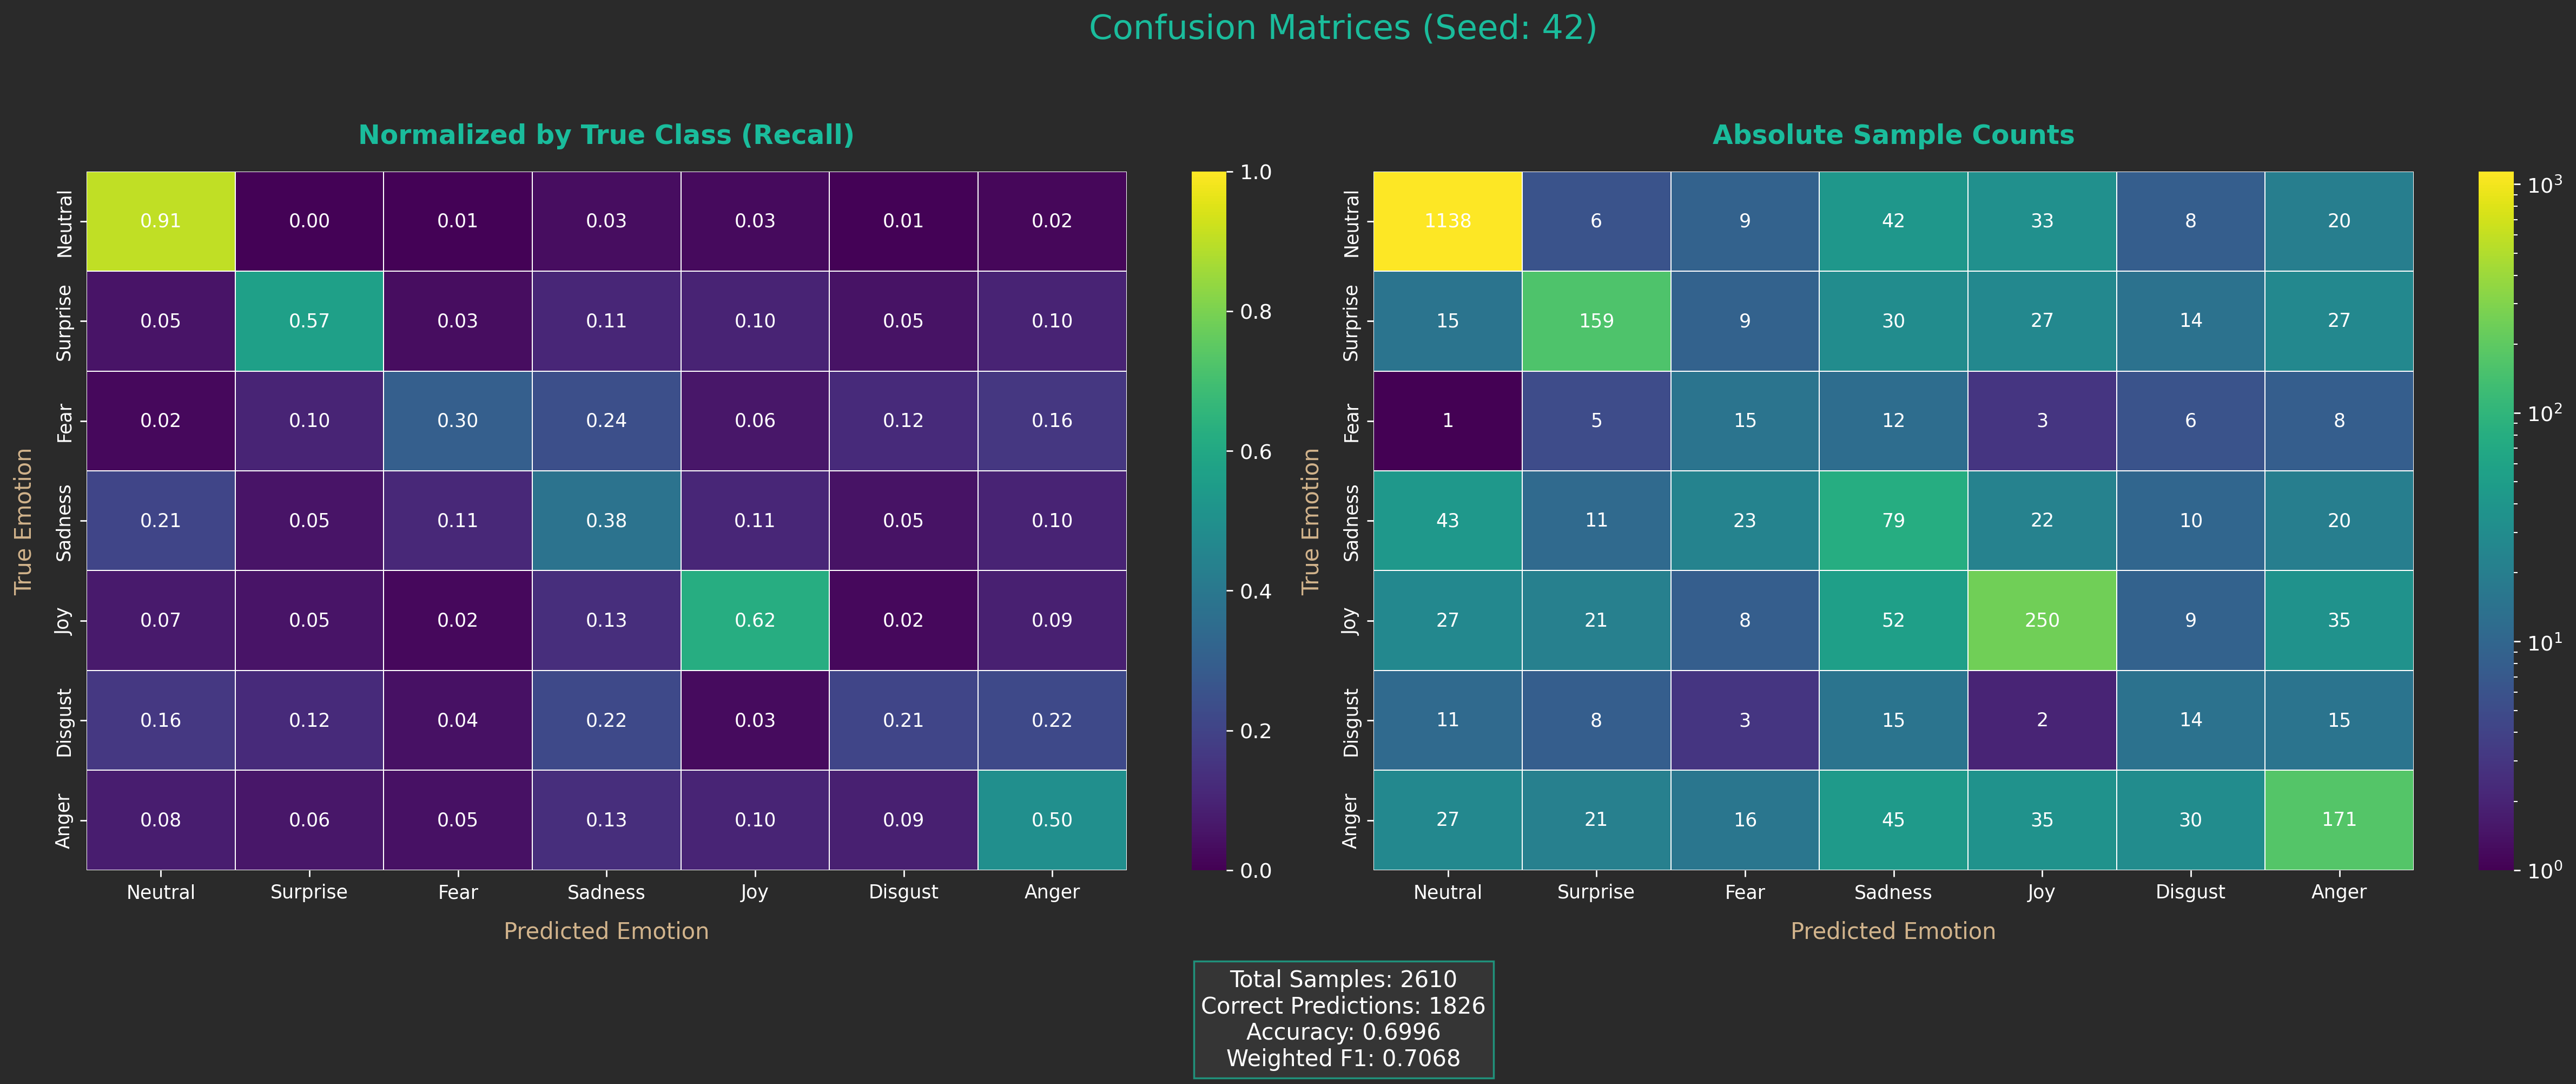

Saved confusion matrix to: confusion_matrix_seed_42.png
ENHANCED EMOTION CLASSIFICATION (Seed 2/5)

Loading data...
Computing class weights...
Class distribution: [6434 1636  358 1002 2308  361 1607]
Class weights: tensor([0.3043, 1.1968, 5.4693, 1.9541, 0.8484, 5.4238, 1.2184])

Creating speaker mapping...
Found 304 unique speakers

Building graphs with enhanced minority oversampling...

Graph Statistics:
Train graphs: 3947 (with enhanced oversampling)
Dev graphs: 114
Test graphs: 280

Model initialized (Seed 2023):
Input dimension: 256
Hidden dimension: 128
Number of speakers: 304
Device: cuda

STARTING TRAINING


Epoch 1/60: 100%|██████████| 247/247 [00:08<00:00, 27.77it/s]



Saved new best model at epoch 1 with Val F1: 0.3427

Epoch 1 Summary (9.1s):
Train Loss: 1.9901 | Acc: 0.3254 | F1: 0.2950
Val Loss:   2.1206 | Acc: 0.4197 | F1: 0.3427
Learning Rate: 0.0000167


Epoch 2/60: 100%|██████████| 247/247 [00:08<00:00, 27.99it/s]



Saved new best model at epoch 2 with Val F1: 0.4783

Epoch 2 Summary (9.1s):
Train Loss: 1.7227 | Acc: 0.4291 | F1: 0.4062
Val Loss:   2.0745 | Acc: 0.4955 | F1: 0.4783
Learning Rate: 0.0000333


Epoch 3/60: 100%|██████████| 247/247 [00:09<00:00, 27.44it/s]



Saved new best model at epoch 3 with Val F1: 0.5661

Epoch 3 Summary (9.2s):
Train Loss: 1.5105 | Acc: 0.5327 | F1: 0.5301
Val Loss:   2.1565 | Acc: 0.5794 | F1: 0.5661
Learning Rate: 0.0000500


Epoch 4/60: 100%|██████████| 247/247 [00:08<00:00, 27.67it/s]



Saved new best model at epoch 4 with Val F1: 0.5867

Epoch 4 Summary (9.2s):
Train Loss: 1.3694 | Acc: 0.6119 | F1: 0.6126
Val Loss:   2.1536 | Acc: 0.5957 | F1: 0.5867
Learning Rate: 0.0000500


Epoch 5/60: 100%|██████████| 247/247 [00:08<00:00, 27.52it/s]



Saved new best model at epoch 5 with Val F1: 0.5990

Epoch 5 Summary (9.2s):
Train Loss: 1.2875 | Acc: 0.6419 | F1: 0.6449
Val Loss:   2.2395 | Acc: 0.6074 | F1: 0.5990
Learning Rate: 0.0000500


Epoch 6/60: 100%|██████████| 247/247 [00:08<00:00, 27.79it/s]



Epoch 6 Summary (9.1s):
Train Loss: 1.2407 | Acc: 0.6580 | F1: 0.6610
Val Loss:   2.2920 | Acc: 0.6056 | F1: 0.5967
Learning Rate: 0.0000500


Epoch 7/60: 100%|██████████| 247/247 [00:08<00:00, 27.48it/s]



Saved new best model at epoch 7 with Val F1: 0.6348

Epoch 7 Summary (9.2s):
Train Loss: 1.1862 | Acc: 0.6776 | F1: 0.6802
Val Loss:   2.3119 | Acc: 0.6363 | F1: 0.6348
Learning Rate: 0.0000500


Epoch 8/60: 100%|██████████| 247/247 [00:08<00:00, 27.80it/s]



Saved new best model at epoch 8 with Val F1: 0.6610

Epoch 8 Summary (9.1s):
Train Loss: 1.1380 | Acc: 0.6970 | F1: 0.7002
Val Loss:   2.1379 | Acc: 0.6570 | F1: 0.6610
Learning Rate: 0.0000500


Epoch 9/60: 100%|██████████| 247/247 [00:08<00:00, 27.90it/s]



Saved new best model at epoch 9 with Val F1: 0.6614

Epoch 9 Summary (9.1s):
Train Loss: 1.0797 | Acc: 0.7170 | F1: 0.7208
Val Loss:   2.1546 | Acc: 0.6588 | F1: 0.6614
Learning Rate: 0.0000500


Epoch 10/60: 100%|██████████| 247/247 [00:08<00:00, 27.94it/s]



Saved new best model at epoch 10 with Val F1: 0.6674

Epoch 10 Summary (9.1s):
Train Loss: 1.0444 | Acc: 0.7262 | F1: 0.7298
Val Loss:   2.1852 | Acc: 0.6588 | F1: 0.6674
Learning Rate: 0.0000500


Epoch 11/60: 100%|██████████| 247/247 [00:08<00:00, 28.13it/s]



Saved new best model at epoch 11 with Val F1: 0.6831

Epoch 11 Summary (9.0s):
Train Loss: 1.0150 | Acc: 0.7399 | F1: 0.7440
Val Loss:   2.0270 | Acc: 0.6661 | F1: 0.6831
Learning Rate: 0.0000500


Epoch 12/60: 100%|██████████| 247/247 [00:08<00:00, 27.92it/s]



Epoch 12 Summary (9.1s):
Train Loss: 0.9791 | Acc: 0.7532 | F1: 0.7567
Val Loss:   2.1000 | Acc: 0.6706 | F1: 0.6813
Learning Rate: 0.0000500


Epoch 13/60: 100%|██████████| 247/247 [00:08<00:00, 27.74it/s]



Saved new best model at epoch 13 with Val F1: 0.6920

Epoch 13 Summary (9.2s):
Train Loss: 0.9634 | Acc: 0.7568 | F1: 0.7603
Val Loss:   2.0909 | Acc: 0.6814 | F1: 0.6920
Learning Rate: 0.0000500


Epoch 14/60: 100%|██████████| 247/247 [00:08<00:00, 27.72it/s]



Epoch 14 Summary (9.1s):
Train Loss: 0.9419 | Acc: 0.7623 | F1: 0.7662
Val Loss:   2.0480 | Acc: 0.6661 | F1: 0.6798
Learning Rate: 0.0000500


Epoch 15/60: 100%|██████████| 247/247 [00:08<00:00, 27.79it/s]



Epoch 15 Summary (9.1s):
Train Loss: 0.9231 | Acc: 0.7688 | F1: 0.7719
Val Loss:   2.2423 | Acc: 0.6742 | F1: 0.6772
Learning Rate: 0.0000500


Epoch 16/60: 100%|██████████| 247/247 [00:09<00:00, 27.38it/s]



Epoch 16 Summary (9.3s):
Train Loss: 0.9008 | Acc: 0.7752 | F1: 0.7788
Val Loss:   2.2462 | Acc: 0.6823 | F1: 0.6868
Learning Rate: 0.0000500


Epoch 17/60: 100%|██████████| 247/247 [00:08<00:00, 27.45it/s]



Saved new best model at epoch 17 with Val F1: 0.6952

Epoch 17 Summary (9.2s):
Train Loss: 0.8937 | Acc: 0.7766 | F1: 0.7799
Val Loss:   2.0737 | Acc: 0.6841 | F1: 0.6952
Learning Rate: 0.0000500


Epoch 18/60: 100%|██████████| 247/247 [00:08<00:00, 27.78it/s]



Saved new best model at epoch 18 with Val F1: 0.7043

Epoch 18 Summary (9.1s):
Train Loss: 0.8704 | Acc: 0.7866 | F1: 0.7893
Val Loss:   2.0793 | Acc: 0.6940 | F1: 0.7043
Learning Rate: 0.0000500


Epoch 19/60: 100%|██████████| 247/247 [00:08<00:00, 27.48it/s]



Epoch 19 Summary (9.2s):
Train Loss: 0.8631 | Acc: 0.7875 | F1: 0.7903
Val Loss:   2.1681 | Acc: 0.6859 | F1: 0.6977
Learning Rate: 0.0000500


Epoch 20/60: 100%|██████████| 247/247 [00:08<00:00, 27.88it/s]



Epoch 20 Summary (9.1s):
Train Loss: 0.8562 | Acc: 0.7898 | F1: 0.7927
Val Loss:   2.0574 | Acc: 0.6913 | F1: 0.7027
Learning Rate: 0.0000500


Epoch 21/60: 100%|██████████| 247/247 [00:08<00:00, 27.46it/s]



Epoch 21 Summary (9.2s):
Train Loss: 0.8467 | Acc: 0.7939 | F1: 0.7965
Val Loss:   2.1536 | Acc: 0.6868 | F1: 0.6979
Learning Rate: 0.0000500


Epoch 22/60: 100%|██████████| 247/247 [00:08<00:00, 27.91it/s]



Epoch 22 Summary (9.1s):
Train Loss: 0.8321 | Acc: 0.7960 | F1: 0.7987
Val Loss:   2.2256 | Acc: 0.6850 | F1: 0.6941
Learning Rate: 0.0000500


Epoch 23/60: 100%|██████████| 247/247 [00:08<00:00, 27.62it/s]



Saved new best model at epoch 23 with Val F1: 0.7045

Epoch 23 Summary (9.2s):
Train Loss: 0.8216 | Acc: 0.8008 | F1: 0.8035
Val Loss:   2.3169 | Acc: 0.7013 | F1: 0.7045
Learning Rate: 0.0000500


Epoch 24/60: 100%|██████████| 247/247 [00:08<00:00, 27.64it/s]



Epoch 24 Summary (9.2s):
Train Loss: 0.8095 | Acc: 0.8045 | F1: 0.8065
Val Loss:   2.1966 | Acc: 0.6913 | F1: 0.6996
Learning Rate: 0.0000500


Epoch 25/60: 100%|██████████| 247/247 [00:08<00:00, 27.71it/s]



Epoch 25 Summary (9.1s):
Train Loss: 0.8062 | Acc: 0.8053 | F1: 0.8078
Val Loss:   2.1811 | Acc: 0.6895 | F1: 0.6990
Learning Rate: 0.0000500


Epoch 26/60: 100%|██████████| 247/247 [00:08<00:00, 27.58it/s]



Epoch 26 Summary (9.2s):
Train Loss: 0.7926 | Acc: 0.8102 | F1: 0.8128
Val Loss:   2.1788 | Acc: 0.6814 | F1: 0.6934
Learning Rate: 0.0000500


Epoch 27/60: 100%|██████████| 247/247 [00:09<00:00, 27.25it/s]



Epoch 27 Summary (9.3s):
Train Loss: 0.7851 | Acc: 0.8128 | F1: 0.8148
Val Loss:   2.1598 | Acc: 0.6868 | F1: 0.6978
Learning Rate: 0.0000500


Epoch 28/60: 100%|██████████| 247/247 [00:09<00:00, 27.38it/s]



Epoch 28 Summary (9.2s):
Train Loss: 0.7793 | Acc: 0.8132 | F1: 0.8153
Val Loss:   2.2590 | Acc: 0.6968 | F1: 0.7031
Learning Rate: 0.0000375


Epoch 29/60: 100%|██████████| 247/247 [00:09<00:00, 27.01it/s]



Epoch 29 Summary (9.4s):
Train Loss: 0.7714 | Acc: 0.8168 | F1: 0.8189
Val Loss:   2.3026 | Acc: 0.6877 | F1: 0.6911
Learning Rate: 0.0000375


Epoch 30/60: 100%|██████████| 247/247 [00:09<00:00, 27.34it/s]



Epoch 30 Summary (9.3s):
Train Loss: 0.7598 | Acc: 0.8197 | F1: 0.8216
Val Loss:   2.2018 | Acc: 0.6859 | F1: 0.6944
Learning Rate: 0.0000375


Epoch 31/60: 100%|██████████| 247/247 [00:09<00:00, 26.65it/s]



Epoch 31 Summary (9.5s):
Train Loss: 0.7550 | Acc: 0.8236 | F1: 0.8256
Val Loss:   2.2770 | Acc: 0.6859 | F1: 0.6938
Learning Rate: 0.0000375


Epoch 32/60: 100%|██████████| 247/247 [00:08<00:00, 28.13it/s]



Epoch 32 Summary (9.0s):
Train Loss: 0.7452 | Acc: 0.8258 | F1: 0.8273
Val Loss:   2.2128 | Acc: 0.6877 | F1: 0.6976
Learning Rate: 0.0000375


Epoch 33/60: 100%|██████████| 247/247 [00:08<00:00, 27.90it/s]



Early stopping at epoch 33 as validation F1 didn't improve for 10 epochs

FINAL EVALUATION (Seed 2023)


Testing: 100%|██████████| 18/18 [00:00<00:00, 51.82it/s]



Overall Test Performance:
Accuracy: 0.7031
Weighted F1: 0.7112
Macro F1: 0.4831 (Minority Focus)

Per-Class Performance:
Neutral   - Precision: 0.8797, Recall: 0.9196, F1: 0.8992, Support: 1256
Surprise  - Precision: 0.7168, Recall: 0.5765, F1: 0.6391, Support: 281
Fear      - Precision: 0.1068, Recall: 0.2200, F1: 0.1438, Support: 50
Sadness   - Precision: 0.2955, Recall: 0.4375, F1: 0.3527, Support: 208
Joy       - Precision: 0.7115, Recall: 0.6443, F1: 0.6762, Support: 402
Disgust   - Precision: 0.1111, Recall: 0.1618, F1: 0.1317, Support: 68
Anger     - Precision: 0.7411, Recall: 0.4232, F1: 0.5387, Support: 345

Classification Report:
              precision    recall  f1-score   support

           0     0.8797    0.9196    0.8992      1256
           1     0.7168    0.5765    0.6391       281
           2     0.1068    0.2200    0.1438        50
           3     0.2955    0.4375    0.3527       208
           4     0.7115    0.6443    0.6762       402
           5     0.1111   

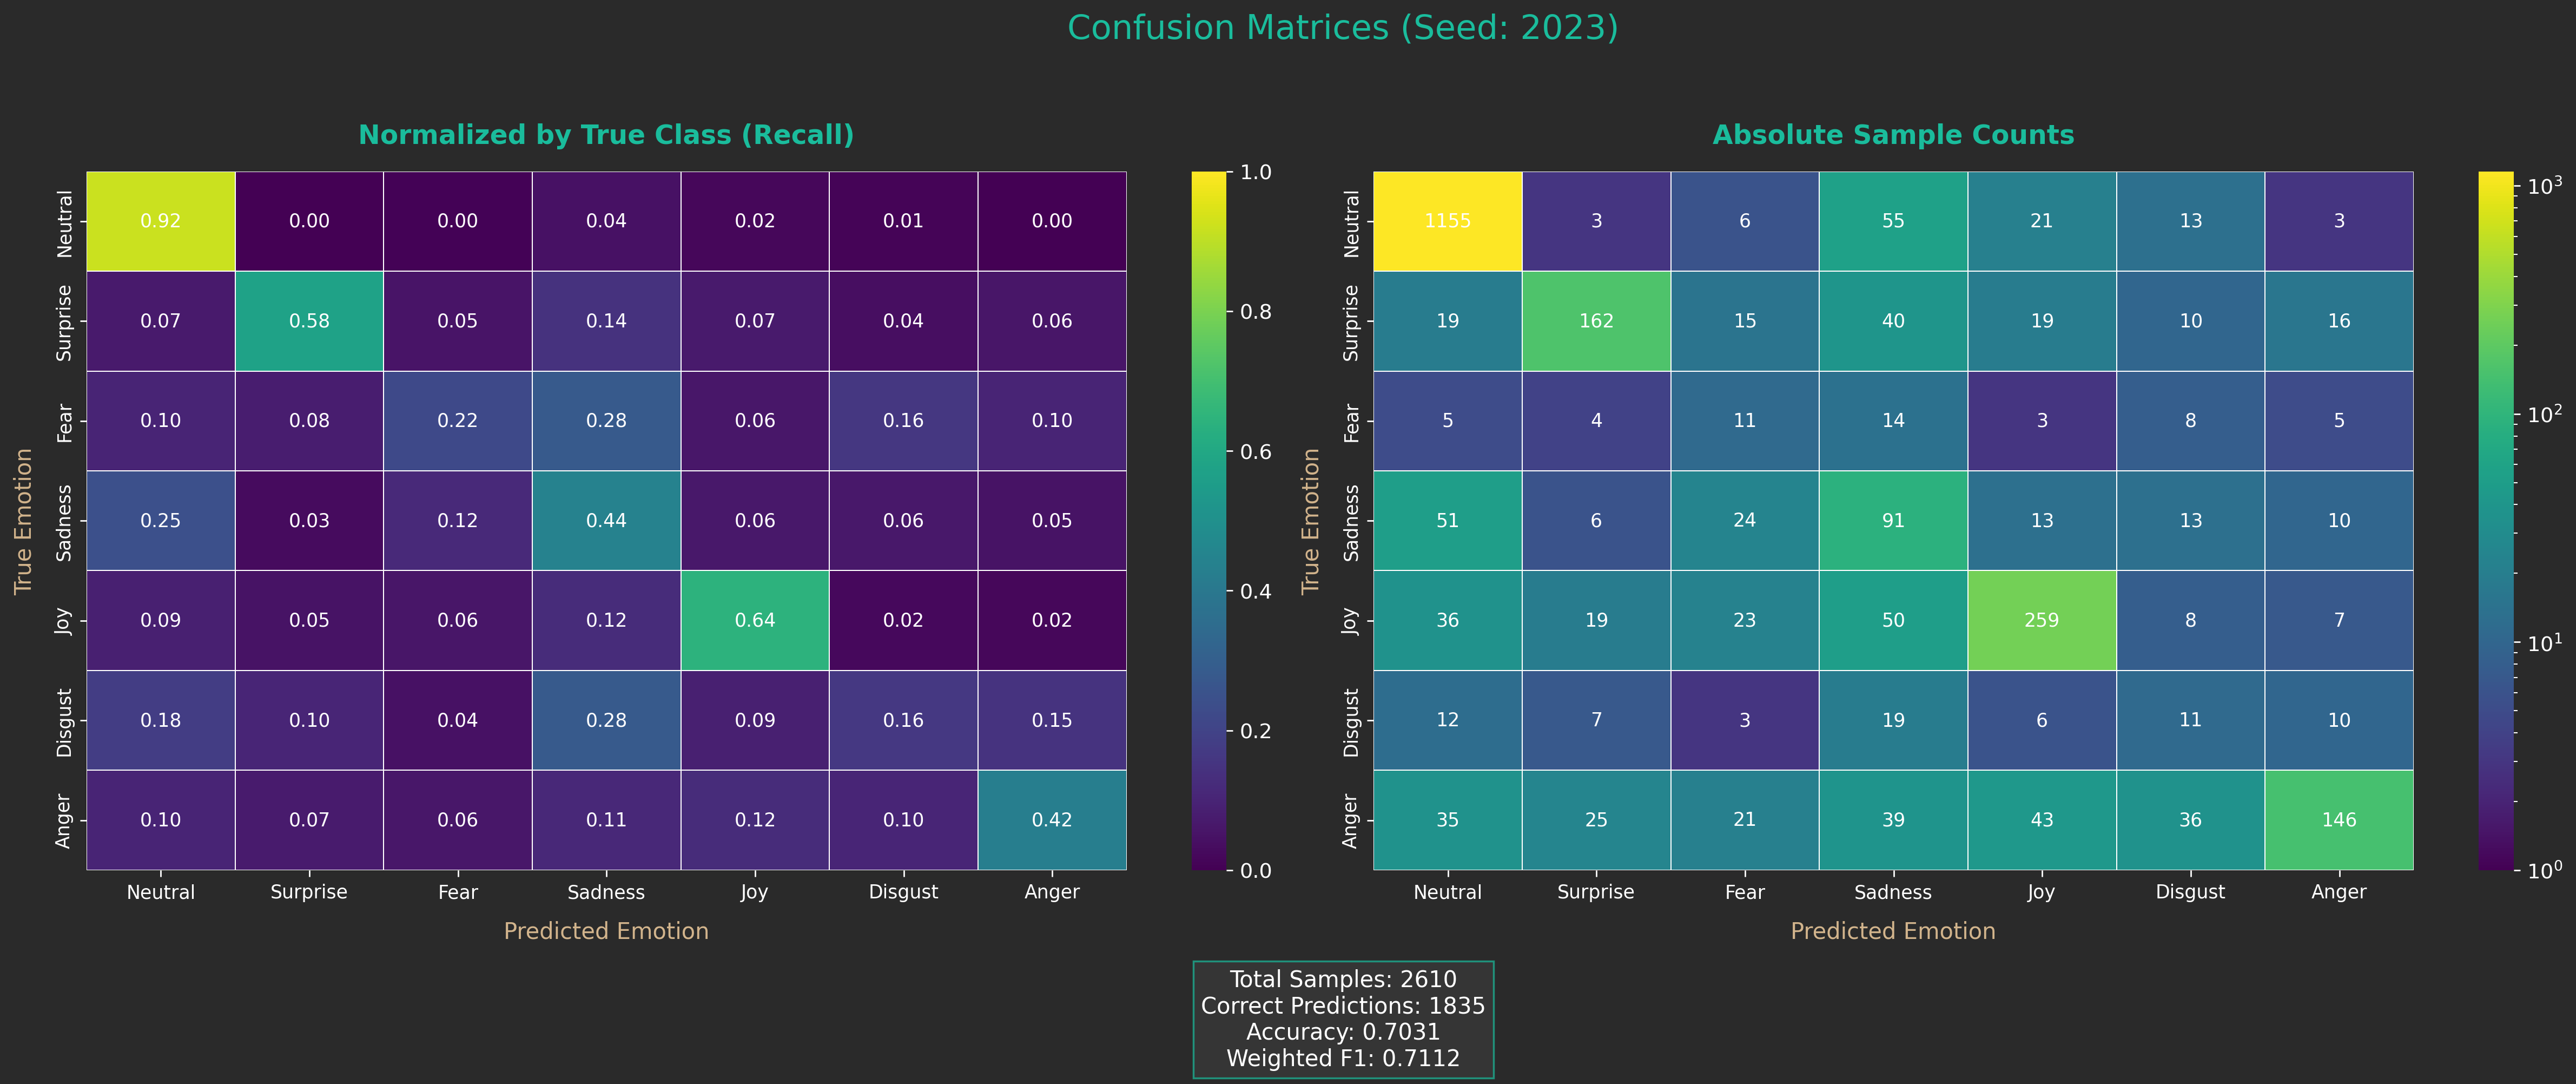

Saved confusion matrix to: confusion_matrix_seed_2023.png
ENHANCED EMOTION CLASSIFICATION (Seed 3/5)

Loading data...
Computing class weights...
Class distribution: [6434 1636  358 1002 2308  361 1607]
Class weights: tensor([0.3043, 1.1968, 5.4693, 1.9541, 0.8484, 5.4238, 1.2184])

Creating speaker mapping...
Found 304 unique speakers

Building graphs with enhanced minority oversampling...

Graph Statistics:
Train graphs: 3947 (with enhanced oversampling)
Dev graphs: 114
Test graphs: 280

Model initialized (Seed 7):
Input dimension: 256
Hidden dimension: 128
Number of speakers: 304
Device: cuda

STARTING TRAINING


Epoch 1/60: 100%|██████████| 247/247 [00:09<00:00, 26.97it/s]



Saved new best model at epoch 1 with Val F1: 0.3252

Epoch 1 Summary (9.4s):
Train Loss: 2.0122 | Acc: 0.3186 | F1: 0.2928
Val Loss:   2.2179 | Acc: 0.4106 | F1: 0.3252
Learning Rate: 0.0000167


Epoch 2/60: 100%|██████████| 247/247 [00:09<00:00, 27.31it/s]



Saved new best model at epoch 2 with Val F1: 0.4858

Epoch 2 Summary (9.3s):
Train Loss: 1.7222 | Acc: 0.4266 | F1: 0.4097
Val Loss:   2.2653 | Acc: 0.5072 | F1: 0.4858
Learning Rate: 0.0000333


Epoch 3/60: 100%|██████████| 247/247 [00:08<00:00, 27.51it/s]



Saved new best model at epoch 3 with Val F1: 0.5778

Epoch 3 Summary (9.2s):
Train Loss: 1.4972 | Acc: 0.5419 | F1: 0.5413
Val Loss:   2.0944 | Acc: 0.5794 | F1: 0.5778
Learning Rate: 0.0000500


Epoch 4/60: 100%|██████████| 247/247 [00:09<00:00, 27.12it/s]



Saved new best model at epoch 4 with Val F1: 0.5955

Epoch 4 Summary (9.4s):
Train Loss: 1.3532 | Acc: 0.6198 | F1: 0.6230
Val Loss:   2.2160 | Acc: 0.5993 | F1: 0.5955
Learning Rate: 0.0000500


Epoch 5/60: 100%|██████████| 247/247 [00:08<00:00, 27.52it/s]



Saved new best model at epoch 5 with Val F1: 0.6062

Epoch 5 Summary (9.2s):
Train Loss: 1.2663 | Acc: 0.6551 | F1: 0.6585
Val Loss:   2.2453 | Acc: 0.6056 | F1: 0.6062
Learning Rate: 0.0000500


Epoch 6/60: 100%|██████████| 247/247 [00:09<00:00, 27.44it/s]



Saved new best model at epoch 6 with Val F1: 0.6343

Epoch 6 Summary (9.3s):
Train Loss: 1.1911 | Acc: 0.6859 | F1: 0.6904
Val Loss:   2.0675 | Acc: 0.6236 | F1: 0.6343
Learning Rate: 0.0000500


Epoch 7/60: 100%|██████████| 247/247 [00:09<00:00, 27.29it/s]



Saved new best model at epoch 7 with Val F1: 0.6468

Epoch 7 Summary (9.3s):
Train Loss: 1.1383 | Acc: 0.7066 | F1: 0.7118
Val Loss:   2.1404 | Acc: 0.6390 | F1: 0.6468
Learning Rate: 0.0000500


Epoch 8/60: 100%|██████████| 247/247 [00:08<00:00, 27.47it/s]



Saved new best model at epoch 8 with Val F1: 0.6521

Epoch 8 Summary (9.2s):
Train Loss: 1.1011 | Acc: 0.7200 | F1: 0.7251
Val Loss:   2.1030 | Acc: 0.6480 | F1: 0.6521
Learning Rate: 0.0000500


Epoch 9/60: 100%|██████████| 247/247 [00:09<00:00, 27.36it/s]



Epoch 9 Summary (9.3s):
Train Loss: 1.0721 | Acc: 0.7288 | F1: 0.7340
Val Loss:   2.4259 | Acc: 0.6480 | F1: 0.6463
Learning Rate: 0.0000500


Epoch 10/60: 100%|██████████| 247/247 [00:08<00:00, 27.64it/s]



Epoch 10 Summary (9.2s):
Train Loss: 1.0364 | Acc: 0.7377 | F1: 0.7425
Val Loss:   2.3000 | Acc: 0.6471 | F1: 0.6500
Learning Rate: 0.0000500


Epoch 11/60: 100%|██████████| 247/247 [00:09<00:00, 27.31it/s]



Saved new best model at epoch 11 with Val F1: 0.6588

Epoch 11 Summary (9.3s):
Train Loss: 1.0011 | Acc: 0.7497 | F1: 0.7543
Val Loss:   2.1890 | Acc: 0.6462 | F1: 0.6588
Learning Rate: 0.0000500


Epoch 12/60: 100%|██████████| 247/247 [00:09<00:00, 27.39it/s]



Saved new best model at epoch 12 with Val F1: 0.6714

Epoch 12 Summary (9.3s):
Train Loss: 0.9824 | Acc: 0.7577 | F1: 0.7626
Val Loss:   2.2726 | Acc: 0.6688 | F1: 0.6714
Learning Rate: 0.0000500


Epoch 13/60: 100%|██████████| 247/247 [00:09<00:00, 27.10it/s]



Epoch 13 Summary (9.3s):
Train Loss: 0.9672 | Acc: 0.7589 | F1: 0.7642
Val Loss:   2.1109 | Acc: 0.6480 | F1: 0.6648
Learning Rate: 0.0000500


Epoch 14/60: 100%|██████████| 247/247 [00:09<00:00, 26.89it/s]



Saved new best model at epoch 14 with Val F1: 0.6810

Epoch 14 Summary (9.4s):
Train Loss: 0.9444 | Acc: 0.7659 | F1: 0.7710
Val Loss:   2.1558 | Acc: 0.6670 | F1: 0.6810
Learning Rate: 0.0000500


Epoch 15/60: 100%|██████████| 247/247 [00:08<00:00, 27.45it/s]



Epoch 15 Summary (9.2s):
Train Loss: 0.9353 | Acc: 0.7668 | F1: 0.7722
Val Loss:   2.2273 | Acc: 0.6661 | F1: 0.6735
Learning Rate: 0.0000500


Epoch 16/60: 100%|██████████| 247/247 [00:09<00:00, 27.36it/s]



Epoch 16 Summary (9.2s):
Train Loss: 0.9159 | Acc: 0.7756 | F1: 0.7807
Val Loss:   2.2593 | Acc: 0.6606 | F1: 0.6702
Learning Rate: 0.0000500


Epoch 17/60: 100%|██████████| 247/247 [00:08<00:00, 27.75it/s]



Epoch 17 Summary (9.1s):
Train Loss: 0.8915 | Acc: 0.7821 | F1: 0.7875
Val Loss:   2.4227 | Acc: 0.6715 | F1: 0.6739
Learning Rate: 0.0000500


Epoch 18/60: 100%|██████████| 247/247 [00:09<00:00, 26.96it/s]



Epoch 18 Summary (9.4s):
Train Loss: 0.8818 | Acc: 0.7833 | F1: 0.7886
Val Loss:   2.3480 | Acc: 0.6652 | F1: 0.6721
Learning Rate: 0.0000500


Epoch 19/60: 100%|██████████| 247/247 [00:08<00:00, 27.51it/s]



Epoch 19 Summary (9.2s):
Train Loss: 0.8806 | Acc: 0.7829 | F1: 0.7879
Val Loss:   2.3125 | Acc: 0.6742 | F1: 0.6809
Learning Rate: 0.0000375


Epoch 20/60: 100%|██████████| 247/247 [00:09<00:00, 27.40it/s]



Epoch 20 Summary (9.2s):
Train Loss: 0.8646 | Acc: 0.7880 | F1: 0.7933
Val Loss:   2.3844 | Acc: 0.6706 | F1: 0.6738
Learning Rate: 0.0000375


Epoch 21/60: 100%|██████████| 247/247 [00:09<00:00, 27.29it/s]



Saved new best model at epoch 21 with Val F1: 0.6855

Epoch 21 Summary (9.3s):
Train Loss: 0.8447 | Acc: 0.7966 | F1: 0.8016
Val Loss:   2.3462 | Acc: 0.6805 | F1: 0.6855
Learning Rate: 0.0000375


Epoch 22/60: 100%|██████████| 247/247 [00:08<00:00, 27.79it/s]



Epoch 22 Summary (9.1s):
Train Loss: 0.8447 | Acc: 0.7944 | F1: 0.7992
Val Loss:   2.3788 | Acc: 0.6661 | F1: 0.6712
Learning Rate: 0.0000375


Epoch 23/60: 100%|██████████| 247/247 [00:08<00:00, 27.88it/s]



Epoch 23 Summary (9.1s):
Train Loss: 0.8362 | Acc: 0.7967 | F1: 0.8019
Val Loss:   2.4565 | Acc: 0.6823 | F1: 0.6840
Learning Rate: 0.0000375


Epoch 24/60: 100%|██████████| 247/247 [00:08<00:00, 28.10it/s]



Saved new best model at epoch 24 with Val F1: 0.6878

Epoch 24 Summary (9.1s):
Train Loss: 0.8283 | Acc: 0.7990 | F1: 0.8037
Val Loss:   2.4334 | Acc: 0.6859 | F1: 0.6878
Learning Rate: 0.0000375


Epoch 25/60: 100%|██████████| 247/247 [00:08<00:00, 27.51it/s]



Epoch 25 Summary (9.2s):
Train Loss: 0.8141 | Acc: 0.8031 | F1: 0.8076
Val Loss:   2.4648 | Acc: 0.6805 | F1: 0.6830
Learning Rate: 0.0000375


Epoch 26/60: 100%|██████████| 247/247 [00:08<00:00, 27.72it/s]



Epoch 26 Summary (9.1s):
Train Loss: 0.8077 | Acc: 0.8063 | F1: 0.8112
Val Loss:   2.4774 | Acc: 0.6706 | F1: 0.6762
Learning Rate: 0.0000375


Epoch 27/60: 100%|██████████| 247/247 [00:08<00:00, 27.80it/s]



Epoch 27 Summary (9.1s):
Train Loss: 0.8093 | Acc: 0.8051 | F1: 0.8099
Val Loss:   2.4461 | Acc: 0.6715 | F1: 0.6764
Learning Rate: 0.0000375


Epoch 28/60: 100%|██████████| 247/247 [00:08<00:00, 27.57it/s]



Epoch 28 Summary (9.2s):
Train Loss: 0.7937 | Acc: 0.8098 | F1: 0.8138
Val Loss:   2.4119 | Acc: 0.6706 | F1: 0.6781
Learning Rate: 0.0000375


Epoch 29/60: 100%|██████████| 247/247 [00:08<00:00, 27.74it/s]



Epoch 29 Summary (9.1s):
Train Loss: 0.7907 | Acc: 0.8098 | F1: 0.8144
Val Loss:   2.4690 | Acc: 0.6706 | F1: 0.6750
Learning Rate: 0.0000281


Epoch 30/60: 100%|██████████| 247/247 [00:08<00:00, 27.68it/s]



Epoch 30 Summary (9.2s):
Train Loss: 0.7889 | Acc: 0.8123 | F1: 0.8164
Val Loss:   2.4264 | Acc: 0.6661 | F1: 0.6760
Learning Rate: 0.0000281


Epoch 31/60: 100%|██████████| 247/247 [00:08<00:00, 27.64it/s]



Epoch 31 Summary (9.2s):
Train Loss: 0.7799 | Acc: 0.8124 | F1: 0.8166
Val Loss:   2.4439 | Acc: 0.6760 | F1: 0.6851
Learning Rate: 0.0000281


Epoch 32/60: 100%|██████████| 247/247 [00:08<00:00, 27.68it/s]



Epoch 32 Summary (9.2s):
Train Loss: 0.7734 | Acc: 0.8167 | F1: 0.8212
Val Loss:   2.5329 | Acc: 0.6760 | F1: 0.6832
Learning Rate: 0.0000281


Epoch 33/60: 100%|██████████| 247/247 [00:09<00:00, 26.14it/s]



Epoch 33 Summary (9.7s):
Train Loss: 0.7693 | Acc: 0.8178 | F1: 0.8221
Val Loss:   2.4523 | Acc: 0.6706 | F1: 0.6805
Learning Rate: 0.0000281


Epoch 34/60: 100%|██████████| 247/247 [00:09<00:00, 27.18it/s]



Early stopping at epoch 34 as validation F1 didn't improve for 10 epochs

FINAL EVALUATION (Seed 7)


Testing: 100%|██████████| 18/18 [00:00<00:00, 53.28it/s]



Overall Test Performance:
Accuracy: 0.7057
Weighted F1: 0.7096
Macro F1: 0.4824 (Minority Focus)

Per-Class Performance:
Neutral   - Precision: 0.8935, Recall: 0.9148, F1: 0.9040, Support: 1256
Surprise  - Precision: 0.6760, Recall: 0.6014, F1: 0.6365, Support: 281
Fear      - Precision: 0.1333, Recall: 0.2000, F1: 0.1600, Support: 50
Sadness   - Precision: 0.2898, Recall: 0.3942, F1: 0.3340, Support: 208
Joy       - Precision: 0.7062, Recall: 0.5920, F1: 0.6441, Support: 402
Disgust   - Precision: 0.1552, Recall: 0.1324, F1: 0.1429, Support: 68
Anger     - Precision: 0.5763, Recall: 0.5362, F1: 0.5556, Support: 345

Classification Report:
              precision    recall  f1-score   support

           0     0.8935    0.9148    0.9040      1256
           1     0.6760    0.6014    0.6365       281
           2     0.1333    0.2000    0.1600        50
           3     0.2898    0.3942    0.3340       208
           4     0.7062    0.5920    0.6441       402
           5     0.1552   

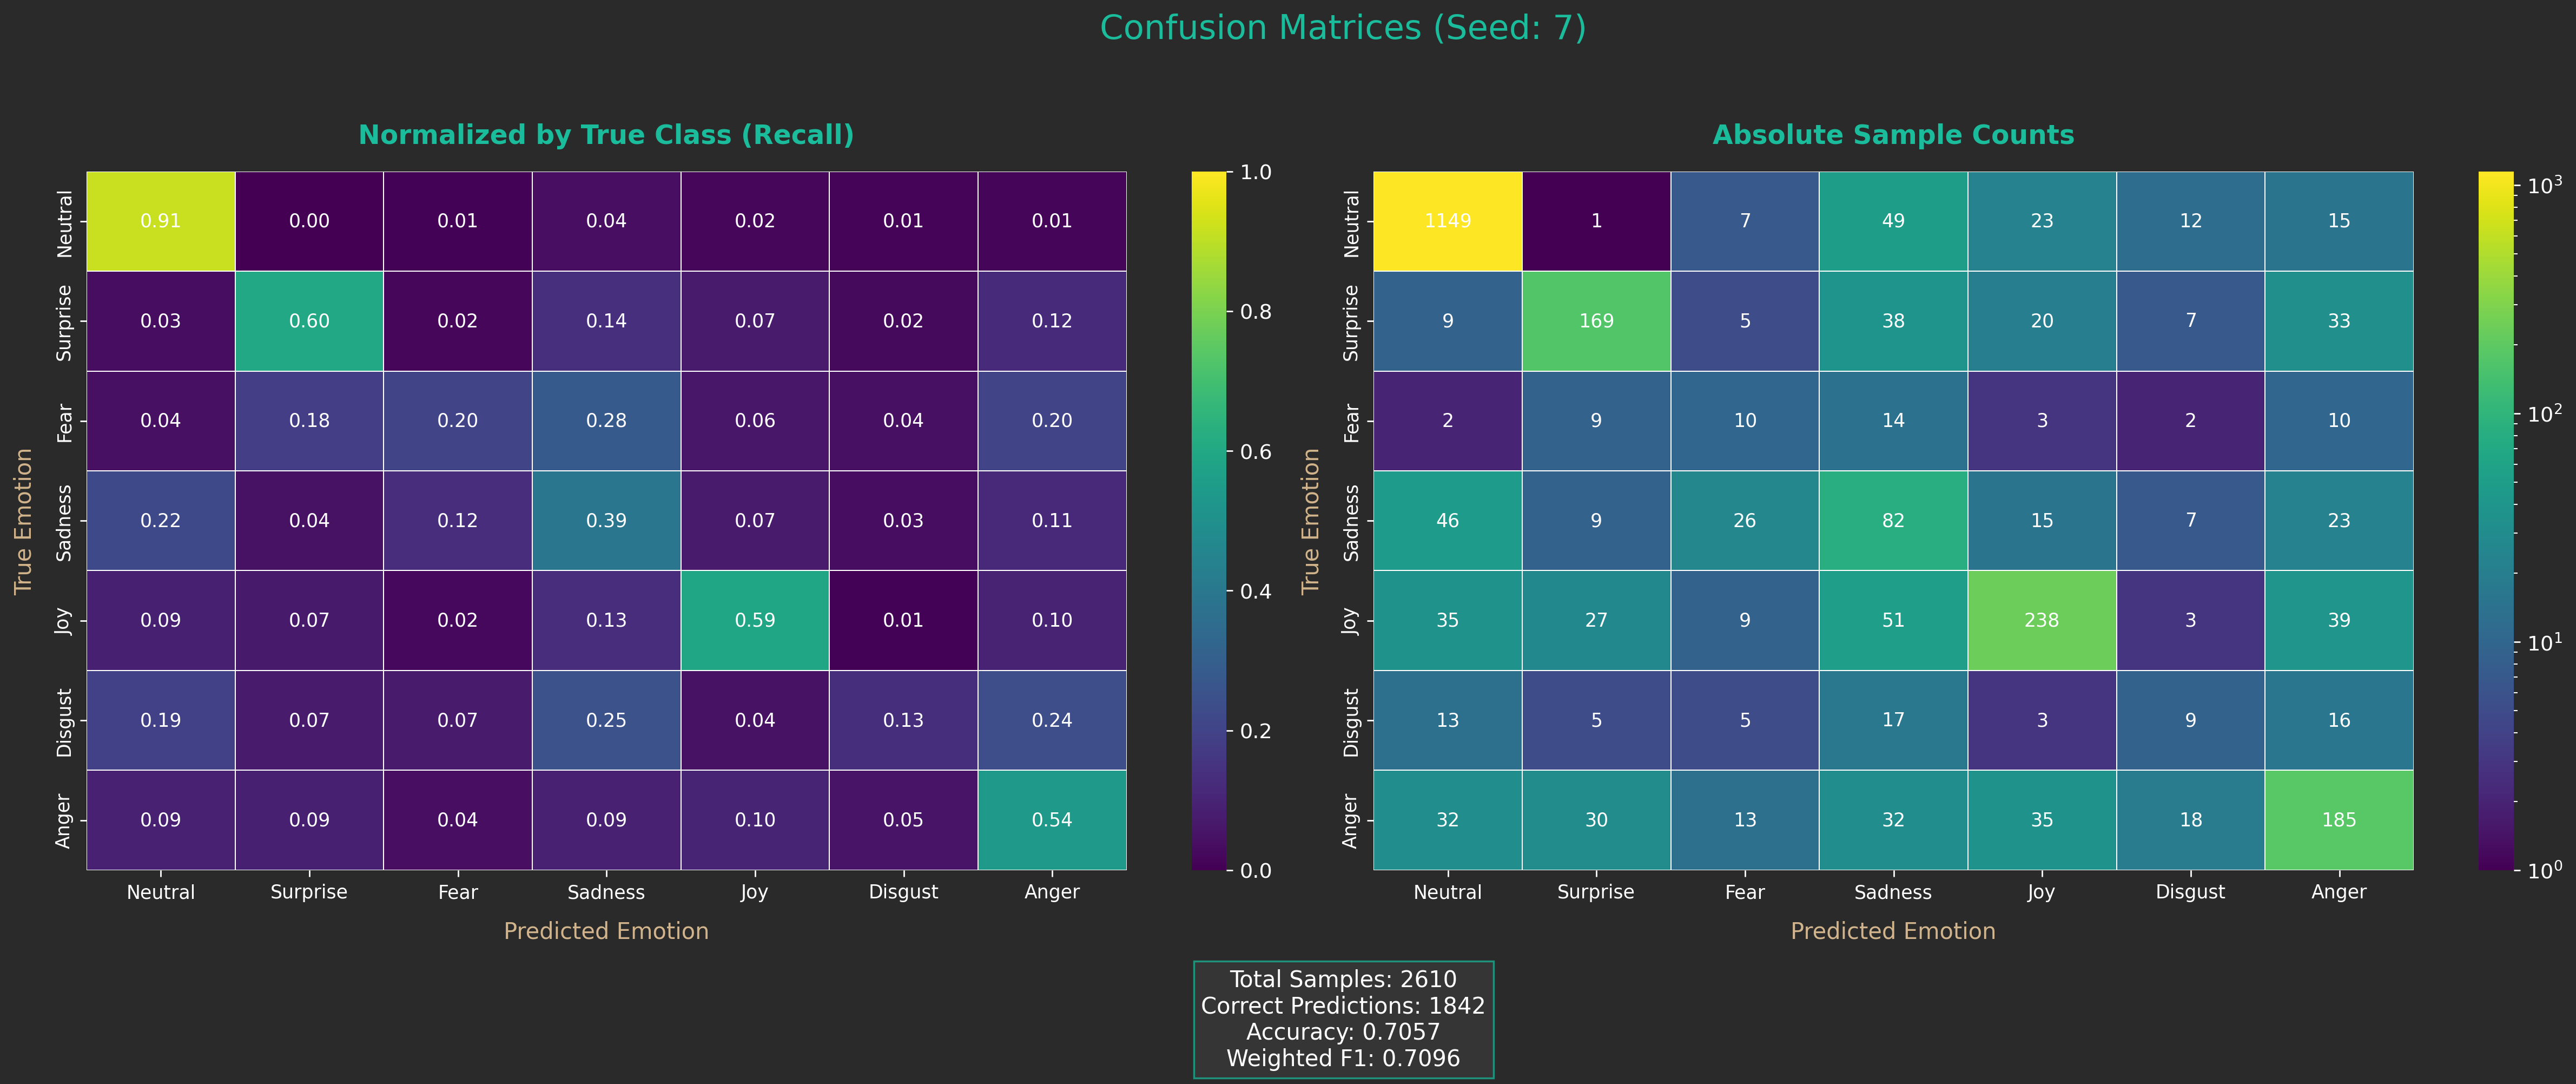

Saved confusion matrix to: confusion_matrix_seed_7.png
ENHANCED EMOTION CLASSIFICATION (Seed 4/5)

Loading data...
Computing class weights...
Class distribution: [6434 1636  358 1002 2308  361 1607]
Class weights: tensor([0.3043, 1.1968, 5.4693, 1.9541, 0.8484, 5.4238, 1.2184])

Creating speaker mapping...
Found 304 unique speakers

Building graphs with enhanced minority oversampling...

Graph Statistics:
Train graphs: 3947 (with enhanced oversampling)
Dev graphs: 114
Test graphs: 280

Model initialized (Seed 123):
Input dimension: 256
Hidden dimension: 128
Number of speakers: 304
Device: cuda

STARTING TRAINING


Epoch 1/60: 100%|██████████| 247/247 [00:09<00:00, 26.94it/s]



Saved new best model at epoch 1 with Val F1: 0.3279

Epoch 1 Summary (9.4s):
Train Loss: 1.9856 | Acc: 0.3194 | F1: 0.2928
Val Loss:   2.0548 | Acc: 0.4152 | F1: 0.3279
Learning Rate: 0.0000167


Epoch 2/60: 100%|██████████| 247/247 [00:09<00:00, 26.77it/s]



Saved new best model at epoch 2 with Val F1: 0.4382

Epoch 2 Summary (9.5s):
Train Loss: 1.7387 | Acc: 0.4146 | F1: 0.3999
Val Loss:   2.1120 | Acc: 0.4657 | F1: 0.4382
Learning Rate: 0.0000333


Epoch 3/60: 100%|██████████| 247/247 [00:09<00:00, 26.90it/s]



Saved new best model at epoch 3 with Val F1: 0.5599

Epoch 3 Summary (9.4s):
Train Loss: 1.5444 | Acc: 0.5146 | F1: 0.5135
Val Loss:   2.0148 | Acc: 0.5623 | F1: 0.5599
Learning Rate: 0.0000500


Epoch 4/60: 100%|██████████| 247/247 [00:09<00:00, 26.70it/s]



Saved new best model at epoch 4 with Val F1: 0.5959

Epoch 4 Summary (9.5s):
Train Loss: 1.4010 | Acc: 0.5945 | F1: 0.5966
Val Loss:   2.0180 | Acc: 0.5930 | F1: 0.5959
Learning Rate: 0.0000500


Epoch 5/60: 100%|██████████| 247/247 [00:09<00:00, 26.85it/s]



Saved new best model at epoch 5 with Val F1: 0.6069

Epoch 5 Summary (9.5s):
Train Loss: 1.3096 | Acc: 0.6334 | F1: 0.6347
Val Loss:   2.1103 | Acc: 0.5993 | F1: 0.6069
Learning Rate: 0.0000500


Epoch 6/60: 100%|██████████| 247/247 [00:09<00:00, 27.02it/s]



Saved new best model at epoch 6 with Val F1: 0.6166

Epoch 6 Summary (9.4s):
Train Loss: 1.2365 | Acc: 0.6594 | F1: 0.6599
Val Loss:   2.2799 | Acc: 0.6273 | F1: 0.6166
Learning Rate: 0.0000500


Epoch 7/60: 100%|██████████| 247/247 [00:09<00:00, 26.74it/s]



Saved new best model at epoch 7 with Val F1: 0.6514

Epoch 7 Summary (9.5s):
Train Loss: 1.1728 | Acc: 0.6810 | F1: 0.6820
Val Loss:   2.1236 | Acc: 0.6534 | F1: 0.6514
Learning Rate: 0.0000500


Epoch 8/60: 100%|██████████| 247/247 [00:09<00:00, 27.30it/s]



Epoch 8 Summary (9.3s):
Train Loss: 1.1220 | Acc: 0.7006 | F1: 0.7023
Val Loss:   2.1284 | Acc: 0.6498 | F1: 0.6503
Learning Rate: 0.0000500


Epoch 9/60: 100%|██████████| 247/247 [00:09<00:00, 27.39it/s]



Saved new best model at epoch 9 with Val F1: 0.6518

Epoch 9 Summary (9.3s):
Train Loss: 1.0797 | Acc: 0.7158 | F1: 0.7176
Val Loss:   2.1577 | Acc: 0.6534 | F1: 0.6518
Learning Rate: 0.0000500


Epoch 10/60: 100%|██████████| 247/247 [00:09<00:00, 27.11it/s]



Saved new best model at epoch 10 with Val F1: 0.6714

Epoch 10 Summary (9.4s):
Train Loss: 1.0390 | Acc: 0.7293 | F1: 0.7312
Val Loss:   2.1409 | Acc: 0.6706 | F1: 0.6714
Learning Rate: 0.0000500


Epoch 11/60: 100%|██████████| 247/247 [00:09<00:00, 26.19it/s]



Epoch 11 Summary (9.7s):
Train Loss: 1.0027 | Acc: 0.7416 | F1: 0.7435
Val Loss:   2.1246 | Acc: 0.6561 | F1: 0.6653
Learning Rate: 0.0000500


Epoch 12/60: 100%|██████████| 247/247 [00:09<00:00, 26.00it/s]



Saved new best model at epoch 12 with Val F1: 0.6721

Epoch 12 Summary (9.7s):
Train Loss: 0.9773 | Acc: 0.7493 | F1: 0.7516
Val Loss:   2.3457 | Acc: 0.6733 | F1: 0.6721
Learning Rate: 0.0000500


Epoch 13/60: 100%|██████████| 247/247 [00:09<00:00, 26.77it/s]



Epoch 13 Summary (9.5s):
Train Loss: 0.9501 | Acc: 0.7575 | F1: 0.7592
Val Loss:   2.0868 | Acc: 0.6616 | F1: 0.6720
Learning Rate: 0.0000500


Epoch 14/60: 100%|██████████| 247/247 [00:09<00:00, 27.00it/s]



Epoch 14 Summary (9.4s):
Train Loss: 0.9330 | Acc: 0.7631 | F1: 0.7649
Val Loss:   2.3124 | Acc: 0.6670 | F1: 0.6691
Learning Rate: 0.0000500


Epoch 15/60: 100%|██████████| 247/247 [00:09<00:00, 27.33it/s]



Saved new best model at epoch 15 with Val F1: 0.6726

Epoch 15 Summary (9.3s):
Train Loss: 0.9244 | Acc: 0.7669 | F1: 0.7698
Val Loss:   2.1844 | Acc: 0.6570 | F1: 0.6726
Learning Rate: 0.0000500


Epoch 16/60: 100%|██████████| 247/247 [00:09<00:00, 27.42it/s]



Epoch 16 Summary (9.3s):
Train Loss: 0.8975 | Acc: 0.7748 | F1: 0.7767
Val Loss:   2.1597 | Acc: 0.6525 | F1: 0.6664
Learning Rate: 0.0000500


Epoch 17/60: 100%|██████████| 247/247 [00:09<00:00, 27.20it/s]



Saved new best model at epoch 17 with Val F1: 0.6805

Epoch 17 Summary (9.3s):
Train Loss: 0.8795 | Acc: 0.7788 | F1: 0.7812
Val Loss:   2.2995 | Acc: 0.6751 | F1: 0.6805
Learning Rate: 0.0000500


Epoch 18/60: 100%|██████████| 247/247 [00:08<00:00, 27.47it/s]



Epoch 18 Summary (9.2s):
Train Loss: 0.8657 | Acc: 0.7839 | F1: 0.7855
Val Loss:   2.3444 | Acc: 0.6724 | F1: 0.6780
Learning Rate: 0.0000500


Epoch 19/60: 100%|██████████| 247/247 [00:08<00:00, 27.50it/s]



Epoch 19 Summary (9.2s):
Train Loss: 0.8512 | Acc: 0.7870 | F1: 0.7892
Val Loss:   2.4890 | Acc: 0.6760 | F1: 0.6776
Learning Rate: 0.0000500


Epoch 20/60: 100%|██████████| 247/247 [00:09<00:00, 27.22it/s]



Epoch 20 Summary (9.3s):
Train Loss: 0.8393 | Acc: 0.7925 | F1: 0.7945
Val Loss:   2.3738 | Acc: 0.6688 | F1: 0.6740
Learning Rate: 0.0000500


Epoch 21/60: 100%|██████████| 247/247 [00:08<00:00, 27.50it/s]



Saved new best model at epoch 21 with Val F1: 0.6824

Epoch 21 Summary (9.2s):
Train Loss: 0.8340 | Acc: 0.7942 | F1: 0.7961
Val Loss:   2.3344 | Acc: 0.6751 | F1: 0.6824
Learning Rate: 0.0000500


Epoch 22/60: 100%|██████████| 247/247 [00:09<00:00, 27.43it/s]



Saved new best model at epoch 22 with Val F1: 0.6856

Epoch 22 Summary (9.3s):
Train Loss: 0.8137 | Acc: 0.7986 | F1: 0.8004
Val Loss:   2.4070 | Acc: 0.6814 | F1: 0.6856
Learning Rate: 0.0000500


Epoch 23/60: 100%|██████████| 247/247 [00:09<00:00, 27.43it/s]



Epoch 23 Summary (9.2s):
Train Loss: 0.8153 | Acc: 0.7991 | F1: 0.8006
Val Loss:   2.4873 | Acc: 0.6787 | F1: 0.6856
Learning Rate: 0.0000500


Epoch 24/60: 100%|██████████| 247/247 [00:09<00:00, 27.18it/s]



Epoch 24 Summary (9.3s):
Train Loss: 0.7930 | Acc: 0.8068 | F1: 0.8082
Val Loss:   2.4400 | Acc: 0.6688 | F1: 0.6774
Learning Rate: 0.0000500


Epoch 25/60: 100%|██████████| 247/247 [00:08<00:00, 27.56it/s]



Epoch 25 Summary (9.2s):
Train Loss: 0.7848 | Acc: 0.8086 | F1: 0.8103
Val Loss:   2.5024 | Acc: 0.6724 | F1: 0.6817
Learning Rate: 0.0000500


Epoch 26/60: 100%|██████████| 247/247 [00:08<00:00, 27.67it/s]



Epoch 26 Summary (9.1s):
Train Loss: 0.7835 | Acc: 0.8110 | F1: 0.8128
Val Loss:   2.3785 | Acc: 0.6724 | F1: 0.6808
Learning Rate: 0.0000500


Epoch 27/60: 100%|██████████| 247/247 [00:09<00:00, 26.53it/s]



Saved new best model at epoch 27 with Val F1: 0.6861

Epoch 27 Summary (9.6s):
Train Loss: 0.7676 | Acc: 0.8150 | F1: 0.8162
Val Loss:   2.5384 | Acc: 0.6805 | F1: 0.6861
Learning Rate: 0.0000500


Epoch 28/60: 100%|██████████| 247/247 [00:09<00:00, 27.29it/s]



Epoch 28 Summary (9.3s):
Train Loss: 0.7594 | Acc: 0.8175 | F1: 0.8187
Val Loss:   2.5720 | Acc: 0.6742 | F1: 0.6835
Learning Rate: 0.0000500


Epoch 29/60: 100%|██████████| 247/247 [00:09<00:00, 27.31it/s]



Epoch 29 Summary (9.3s):
Train Loss: 0.7519 | Acc: 0.8196 | F1: 0.8207
Val Loss:   2.4811 | Acc: 0.6643 | F1: 0.6758
Learning Rate: 0.0000500


Epoch 30/60: 100%|██████████| 247/247 [00:08<00:00, 27.52it/s]



Saved new best model at epoch 30 with Val F1: 0.6915

Epoch 30 Summary (9.2s):
Train Loss: 0.7436 | Acc: 0.8226 | F1: 0.8238
Val Loss:   2.6101 | Acc: 0.6868 | F1: 0.6915
Learning Rate: 0.0000500


Epoch 31/60: 100%|██████████| 247/247 [00:09<00:00, 27.11it/s]



Epoch 31 Summary (9.3s):
Train Loss: 0.7505 | Acc: 0.8221 | F1: 0.8234
Val Loss:   2.6835 | Acc: 0.6841 | F1: 0.6913
Learning Rate: 0.0000500


Epoch 32/60: 100%|██████████| 247/247 [00:09<00:00, 27.35it/s]



Epoch 32 Summary (9.2s):
Train Loss: 0.7386 | Acc: 0.8253 | F1: 0.8266
Val Loss:   2.6385 | Acc: 0.6886 | F1: 0.6877
Learning Rate: 0.0000500


Epoch 33/60: 100%|██████████| 247/247 [00:09<00:00, 27.27it/s]



Epoch 33 Summary (9.3s):
Train Loss: 0.7385 | Acc: 0.8254 | F1: 0.8265
Val Loss:   2.6529 | Acc: 0.6877 | F1: 0.6901
Learning Rate: 0.0000500


Epoch 34/60: 100%|██████████| 247/247 [00:09<00:00, 26.96it/s]



Epoch 34 Summary (9.4s):
Train Loss: 0.7225 | Acc: 0.8303 | F1: 0.8314
Val Loss:   2.7416 | Acc: 0.6796 | F1: 0.6854
Learning Rate: 0.0000500


Epoch 35/60: 100%|██████████| 247/247 [00:09<00:00, 27.26it/s]



Epoch 35 Summary (9.3s):
Train Loss: 0.7166 | Acc: 0.8323 | F1: 0.8330
Val Loss:   2.4474 | Acc: 0.6814 | F1: 0.6864
Learning Rate: 0.0000375


Epoch 36/60: 100%|██████████| 247/247 [00:08<00:00, 27.50it/s]



Saved new best model at epoch 36 with Val F1: 0.6945

Epoch 36 Summary (9.2s):
Train Loss: 0.7115 | Acc: 0.8350 | F1: 0.8358
Val Loss:   2.6678 | Acc: 0.6895 | F1: 0.6945
Learning Rate: 0.0000375


Epoch 37/60: 100%|██████████| 247/247 [00:09<00:00, 27.04it/s]



Epoch 37 Summary (9.4s):
Train Loss: 0.7015 | Acc: 0.8389 | F1: 0.8397
Val Loss:   2.6667 | Acc: 0.6868 | F1: 0.6902
Learning Rate: 0.0000375


Epoch 38/60: 100%|██████████| 247/247 [00:09<00:00, 27.07it/s]



Saved new best model at epoch 38 with Val F1: 0.6963

Epoch 38 Summary (9.4s):
Train Loss: 0.6991 | Acc: 0.8387 | F1: 0.8395
Val Loss:   2.6276 | Acc: 0.6922 | F1: 0.6963
Learning Rate: 0.0000375


Epoch 39/60: 100%|██████████| 247/247 [00:09<00:00, 27.31it/s]



Epoch 39 Summary (9.3s):
Train Loss: 0.6927 | Acc: 0.8401 | F1: 0.8411
Val Loss:   2.6246 | Acc: 0.6913 | F1: 0.6950
Learning Rate: 0.0000375


Epoch 40/60: 100%|██████████| 247/247 [00:09<00:00, 27.40it/s]



Epoch 40 Summary (9.2s):
Train Loss: 0.6933 | Acc: 0.8406 | F1: 0.8414
Val Loss:   2.6535 | Acc: 0.6814 | F1: 0.6871
Learning Rate: 0.0000375


Epoch 41/60: 100%|██████████| 247/247 [00:09<00:00, 27.18it/s]



Epoch 41 Summary (9.3s):
Train Loss: 0.6833 | Acc: 0.8422 | F1: 0.8427
Val Loss:   2.6654 | Acc: 0.6751 | F1: 0.6840
Learning Rate: 0.0000375


Epoch 42/60: 100%|██████████| 247/247 [00:08<00:00, 27.45it/s]



Epoch 42 Summary (9.2s):
Train Loss: 0.6825 | Acc: 0.8468 | F1: 0.8476
Val Loss:   2.5122 | Acc: 0.6715 | F1: 0.6830
Learning Rate: 0.0000375


Epoch 43/60: 100%|██████████| 247/247 [00:09<00:00, 27.41it/s]



Saved new best model at epoch 43 with Val F1: 0.7008

Epoch 43 Summary (9.3s):
Train Loss: 0.6818 | Acc: 0.8442 | F1: 0.8448
Val Loss:   2.6249 | Acc: 0.6958 | F1: 0.7008
Learning Rate: 0.0000375


Epoch 44/60: 100%|██████████| 247/247 [00:09<00:00, 27.04it/s]



Epoch 44 Summary (9.4s):
Train Loss: 0.6717 | Acc: 0.8473 | F1: 0.8480
Val Loss:   2.8063 | Acc: 0.6904 | F1: 0.6925
Learning Rate: 0.0000375


Epoch 45/60: 100%|██████████| 247/247 [00:08<00:00, 27.48it/s]



Epoch 45 Summary (9.2s):
Train Loss: 0.6711 | Acc: 0.8475 | F1: 0.8483
Val Loss:   2.6456 | Acc: 0.6823 | F1: 0.6923
Learning Rate: 0.0000375


Epoch 46/60: 100%|██████████| 247/247 [00:09<00:00, 27.36it/s]



Epoch 46 Summary (9.2s):
Train Loss: 0.6692 | Acc: 0.8490 | F1: 0.8495
Val Loss:   2.7577 | Acc: 0.6805 | F1: 0.6872
Learning Rate: 0.0000375


Epoch 47/60: 100%|██████████| 247/247 [00:09<00:00, 27.41it/s]



Epoch 47 Summary (9.2s):
Train Loss: 0.6719 | Acc: 0.8479 | F1: 0.8488
Val Loss:   2.7459 | Acc: 0.6841 | F1: 0.6907
Learning Rate: 0.0000375


Epoch 48/60: 100%|██████████| 247/247 [00:09<00:00, 26.90it/s]



Epoch 48 Summary (9.4s):
Train Loss: 0.6582 | Acc: 0.8523 | F1: 0.8528
Val Loss:   2.5787 | Acc: 0.6850 | F1: 0.6950
Learning Rate: 0.0000281


Epoch 49/60: 100%|██████████| 247/247 [00:09<00:00, 27.12it/s]



Epoch 49 Summary (9.3s):
Train Loss: 0.6647 | Acc: 0.8480 | F1: 0.8487
Val Loss:   2.7215 | Acc: 0.6877 | F1: 0.6899
Learning Rate: 0.0000281


Epoch 50/60: 100%|██████████| 247/247 [00:09<00:00, 27.39it/s]



Epoch 50 Summary (9.2s):
Train Loss: 0.6557 | Acc: 0.8518 | F1: 0.8524
Val Loss:   2.7792 | Acc: 0.6868 | F1: 0.6931
Learning Rate: 0.0000281


Epoch 51/60: 100%|██████████| 247/247 [00:09<00:00, 27.18it/s]



Saved new best model at epoch 51 with Val F1: 0.7010

Epoch 51 Summary (9.3s):
Train Loss: 0.6499 | Acc: 0.8539 | F1: 0.8544
Val Loss:   2.7902 | Acc: 0.6968 | F1: 0.7010
Learning Rate: 0.0000281


Epoch 52/60: 100%|██████████| 247/247 [00:09<00:00, 27.43it/s]



Epoch 52 Summary (9.2s):
Train Loss: 0.6504 | Acc: 0.8548 | F1: 0.8553
Val Loss:   2.6947 | Acc: 0.6940 | F1: 0.6987
Learning Rate: 0.0000281


Epoch 53/60: 100%|██████████| 247/247 [00:09<00:00, 27.16it/s]



Epoch 53 Summary (9.3s):
Train Loss: 0.6431 | Acc: 0.8571 | F1: 0.8576
Val Loss:   2.7609 | Acc: 0.6814 | F1: 0.6847
Learning Rate: 0.0000281


Epoch 54/60: 100%|██████████| 247/247 [00:09<00:00, 27.01it/s]



Epoch 54 Summary (9.4s):
Train Loss: 0.6401 | Acc: 0.8577 | F1: 0.8583
Val Loss:   2.7828 | Acc: 0.6886 | F1: 0.6938
Learning Rate: 0.0000281


Epoch 55/60: 100%|██████████| 247/247 [00:09<00:00, 27.43it/s]



Epoch 55 Summary (9.2s):
Train Loss: 0.6413 | Acc: 0.8566 | F1: 0.8570
Val Loss:   2.6988 | Acc: 0.6850 | F1: 0.6905
Learning Rate: 0.0000281


Epoch 56/60: 100%|██████████| 247/247 [00:09<00:00, 27.26it/s]



Epoch 56 Summary (9.3s):
Train Loss: 0.6375 | Acc: 0.8593 | F1: 0.8596
Val Loss:   2.8313 | Acc: 0.6913 | F1: 0.6951
Learning Rate: 0.0000211


Epoch 57/60: 100%|██████████| 247/247 [00:09<00:00, 27.15it/s]



Epoch 57 Summary (9.3s):
Train Loss: 0.6321 | Acc: 0.8599 | F1: 0.8603
Val Loss:   2.7951 | Acc: 0.6913 | F1: 0.6928
Learning Rate: 0.0000211


Epoch 58/60: 100%|██████████| 247/247 [00:09<00:00, 26.98it/s]



Epoch 58 Summary (9.4s):
Train Loss: 0.6335 | Acc: 0.8600 | F1: 0.8602
Val Loss:   2.8494 | Acc: 0.6904 | F1: 0.6931
Learning Rate: 0.0000211


Epoch 59/60: 100%|██████████| 247/247 [00:08<00:00, 27.56it/s]



Epoch 59 Summary (9.2s):
Train Loss: 0.6292 | Acc: 0.8621 | F1: 0.8623
Val Loss:   2.7902 | Acc: 0.6850 | F1: 0.6875
Learning Rate: 0.0000211


Epoch 60/60: 100%|██████████| 247/247 [00:08<00:00, 27.52it/s]



Epoch 60 Summary (9.2s):
Train Loss: 0.6286 | Acc: 0.8612 | F1: 0.8617
Val Loss:   2.7267 | Acc: 0.6868 | F1: 0.6933
Learning Rate: 0.0000211

FINAL EVALUATION (Seed 123)


Testing: 100%|██████████| 18/18 [00:00<00:00, 53.49it/s]



Overall Test Performance:
Accuracy: 0.7295
Weighted F1: 0.7287
Macro F1: 0.5107 (Minority Focus)

Per-Class Performance:
Neutral   - Precision: 0.9184, Recall: 0.9228, F1: 0.9206, Support: 1256
Surprise  - Precision: 0.6598, Recall: 0.6833, F1: 0.6713, Support: 281
Fear      - Precision: 0.2000, Recall: 0.2600, F1: 0.2261, Support: 50
Sadness   - Precision: 0.3178, Recall: 0.3269, F1: 0.3223, Support: 208
Joy       - Precision: 0.6548, Recall: 0.6891, F1: 0.6715, Support: 402
Disgust   - Precision: 0.2222, Recall: 0.1765, F1: 0.1967, Support: 68
Anger     - Precision: 0.6080, Recall: 0.5304, F1: 0.5666, Support: 345

Classification Report:
              precision    recall  f1-score   support

           0     0.9184    0.9228    0.9206      1256
           1     0.6598    0.6833    0.6713       281
           2     0.2000    0.2600    0.2261        50
           3     0.3178    0.3269    0.3223       208
           4     0.6548    0.6891    0.6715       402
           5     0.2222   

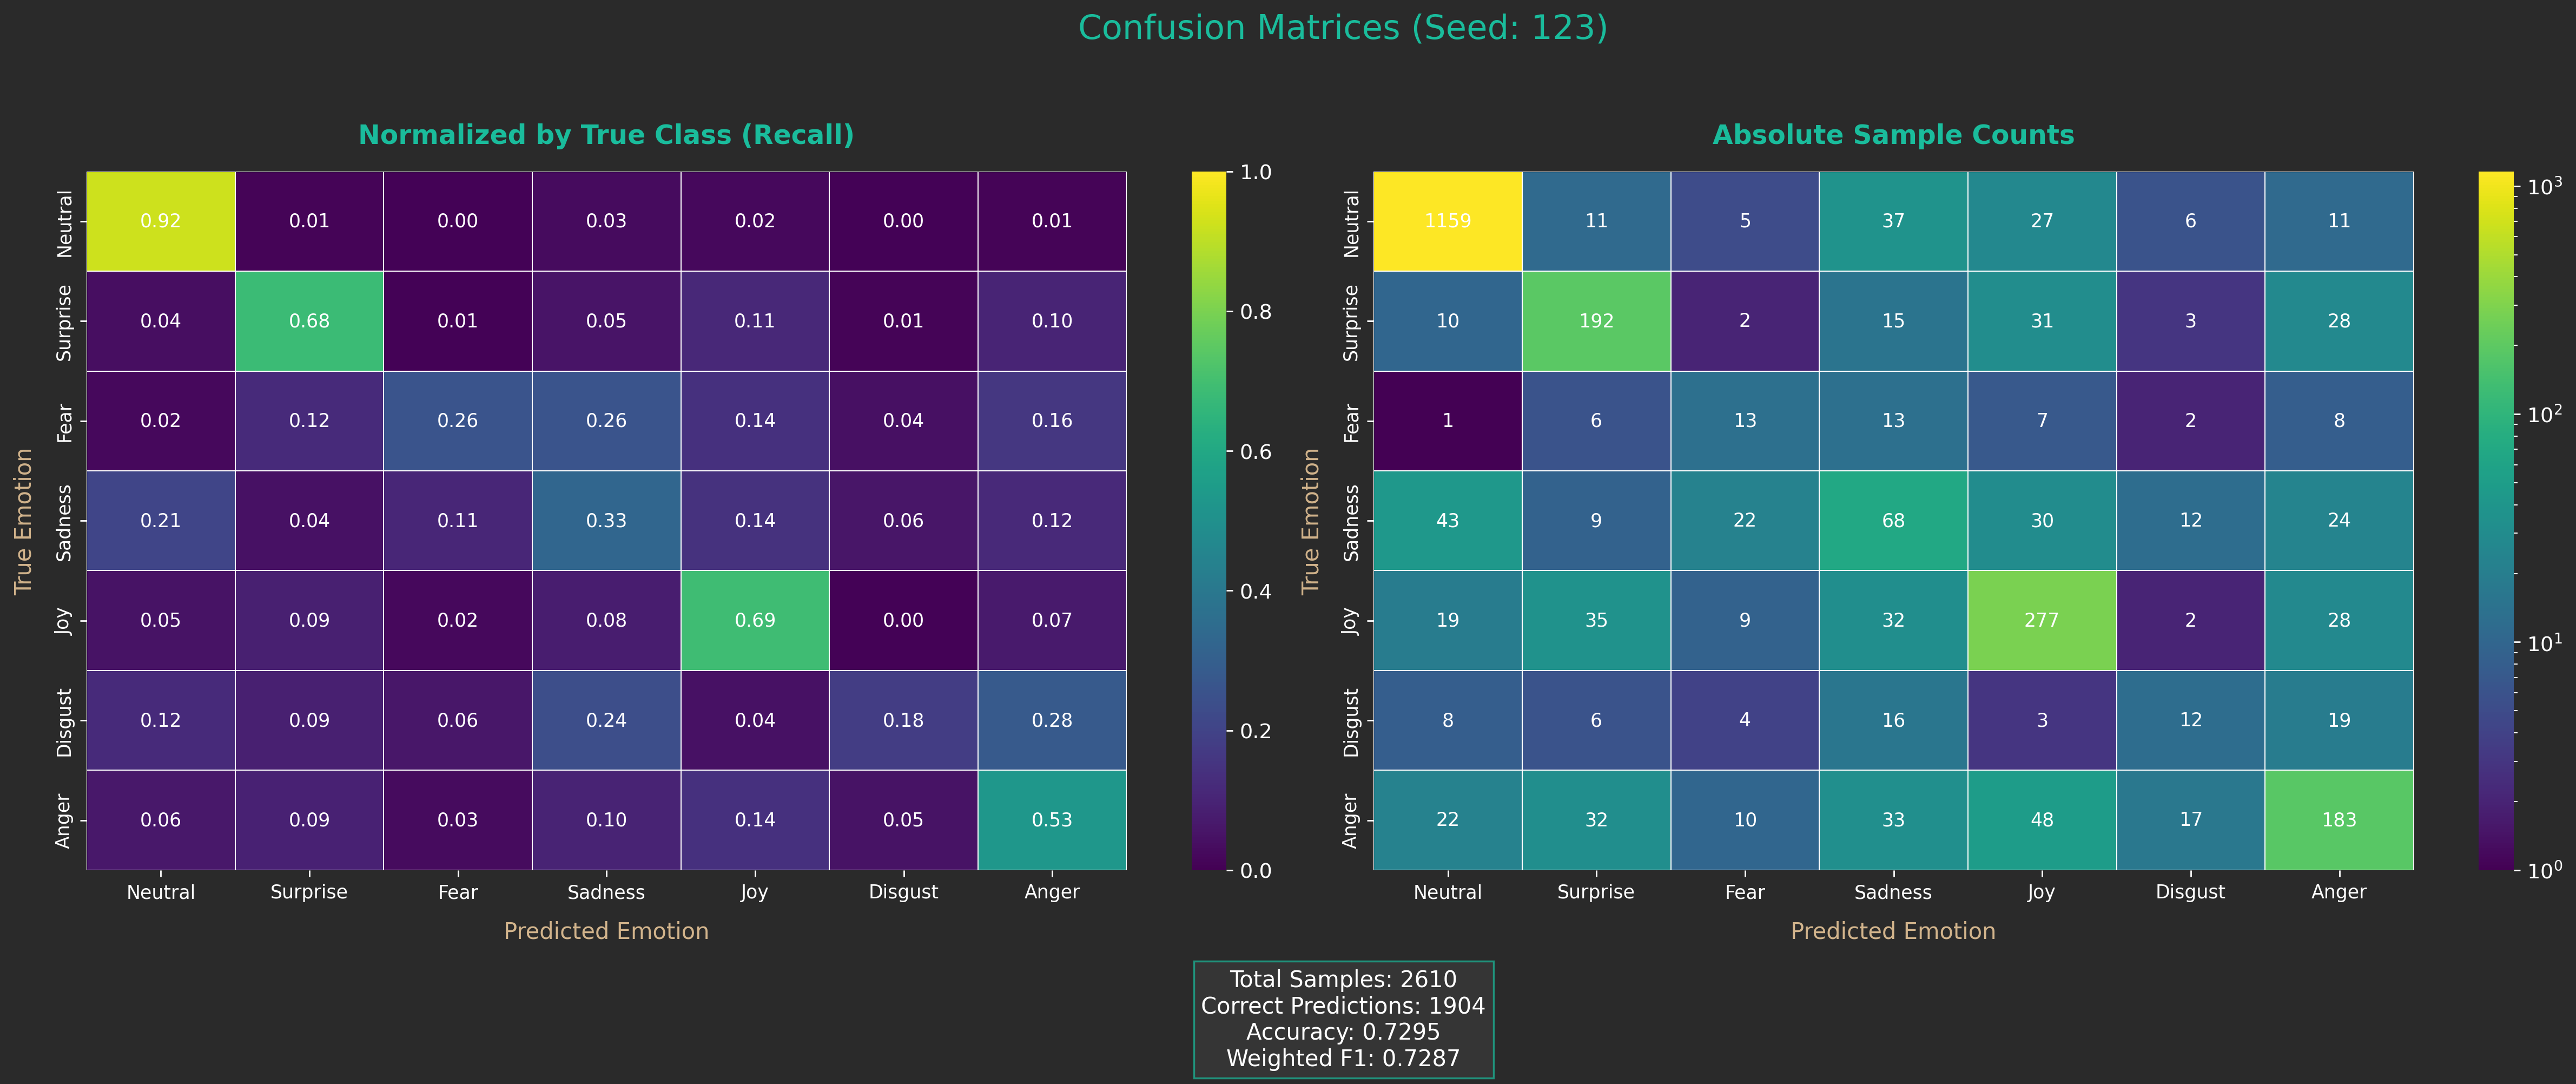

Saved confusion matrix to: confusion_matrix_seed_123.png
ENHANCED EMOTION CLASSIFICATION (Seed 5/5)

Loading data...
Computing class weights...
Class distribution: [6434 1636  358 1002 2308  361 1607]
Class weights: tensor([0.3043, 1.1968, 5.4693, 1.9541, 0.8484, 5.4238, 1.2184])

Creating speaker mapping...
Found 304 unique speakers

Building graphs with enhanced minority oversampling...

Graph Statistics:
Train graphs: 3947 (with enhanced oversampling)
Dev graphs: 114
Test graphs: 280

Model initialized (Seed 314):
Input dimension: 256
Hidden dimension: 128
Number of speakers: 304
Device: cuda

STARTING TRAINING


Epoch 1/60: 100%|██████████| 247/247 [00:08<00:00, 27.77it/s]



Saved new best model at epoch 1 with Val F1: 0.3026

Epoch 1 Summary (9.1s):
Train Loss: 2.0288 | Acc: 0.3077 | F1: 0.2731
Val Loss:   2.1137 | Acc: 0.4025 | F1: 0.3026
Learning Rate: 0.0000167


Epoch 2/60: 100%|██████████| 247/247 [00:08<00:00, 28.31it/s]



Saved new best model at epoch 2 with Val F1: 0.4974

Epoch 2 Summary (9.0s):
Train Loss: 1.7197 | Acc: 0.4286 | F1: 0.4085
Val Loss:   2.1057 | Acc: 0.5126 | F1: 0.4974
Learning Rate: 0.0000333


Epoch 3/60: 100%|██████████| 247/247 [00:08<00:00, 28.34it/s]



Saved new best model at epoch 3 with Val F1: 0.5852

Epoch 3 Summary (9.0s):
Train Loss: 1.4690 | Acc: 0.5591 | F1: 0.5582
Val Loss:   2.1201 | Acc: 0.5884 | F1: 0.5852
Learning Rate: 0.0000500


Epoch 4/60: 100%|██████████| 247/247 [00:08<00:00, 27.74it/s]



Saved new best model at epoch 4 with Val F1: 0.6016

Epoch 4 Summary (9.2s):
Train Loss: 1.3377 | Acc: 0.6264 | F1: 0.6294
Val Loss:   2.1811 | Acc: 0.5993 | F1: 0.6016
Learning Rate: 0.0000500


Epoch 5/60: 100%|██████████| 247/247 [00:08<00:00, 28.35it/s]



Saved new best model at epoch 5 with Val F1: 0.6150

Epoch 5 Summary (9.0s):
Train Loss: 1.2501 | Acc: 0.6643 | F1: 0.6686
Val Loss:   2.0491 | Acc: 0.6020 | F1: 0.6150
Learning Rate: 0.0000500


Epoch 6/60: 100%|██████████| 247/247 [00:08<00:00, 28.24it/s]



Saved new best model at epoch 6 with Val F1: 0.6432

Epoch 6 Summary (9.0s):
Train Loss: 1.1566 | Acc: 0.6975 | F1: 0.7016
Val Loss:   2.0152 | Acc: 0.6318 | F1: 0.6432
Learning Rate: 0.0000500


Epoch 7/60: 100%|██████████| 247/247 [00:08<00:00, 28.32it/s]



Saved new best model at epoch 7 with Val F1: 0.6611

Epoch 7 Summary (9.0s):
Train Loss: 1.1021 | Acc: 0.7186 | F1: 0.7235
Val Loss:   1.9799 | Acc: 0.6480 | F1: 0.6611
Learning Rate: 0.0000500


Epoch 8/60: 100%|██████████| 247/247 [00:09<00:00, 27.36it/s]



Saved new best model at epoch 8 with Val F1: 0.6635

Epoch 8 Summary (9.3s):
Train Loss: 1.0548 | Acc: 0.7333 | F1: 0.7382
Val Loss:   1.9790 | Acc: 0.6525 | F1: 0.6635
Learning Rate: 0.0000500


Epoch 9/60: 100%|██████████| 247/247 [00:09<00:00, 27.13it/s]



Epoch 9 Summary (9.3s):
Train Loss: 1.0275 | Acc: 0.7455 | F1: 0.7507
Val Loss:   2.1459 | Acc: 0.6516 | F1: 0.6621
Learning Rate: 0.0000500


Epoch 10/60: 100%|██████████| 247/247 [00:08<00:00, 27.70it/s]



Saved new best model at epoch 10 with Val F1: 0.6734

Epoch 10 Summary (9.2s):
Train Loss: 0.9962 | Acc: 0.7503 | F1: 0.7565
Val Loss:   2.0434 | Acc: 0.6652 | F1: 0.6734
Learning Rate: 0.0000500


Epoch 11/60: 100%|██████████| 247/247 [00:08<00:00, 27.90it/s]



Epoch 11 Summary (9.1s):
Train Loss: 0.9735 | Acc: 0.7607 | F1: 0.7661
Val Loss:   2.1537 | Acc: 0.6670 | F1: 0.6701
Learning Rate: 0.0000500


Epoch 12/60: 100%|██████████| 247/247 [00:08<00:00, 28.36it/s]



Epoch 12 Summary (8.9s):
Train Loss: 0.9508 | Acc: 0.7658 | F1: 0.7711
Val Loss:   2.0439 | Acc: 0.6579 | F1: 0.6727
Learning Rate: 0.0000500


Epoch 13/60: 100%|██████████| 247/247 [00:08<00:00, 28.33it/s]



Saved new best model at epoch 13 with Val F1: 0.6751

Epoch 13 Summary (9.0s):
Train Loss: 0.9429 | Acc: 0.7679 | F1: 0.7738
Val Loss:   2.0492 | Acc: 0.6597 | F1: 0.6751
Learning Rate: 0.0000500


Epoch 14/60: 100%|██████████| 247/247 [00:08<00:00, 28.33it/s]



Epoch 14 Summary (8.9s):
Train Loss: 0.9266 | Acc: 0.7741 | F1: 0.7797
Val Loss:   1.9824 | Acc: 0.6498 | F1: 0.6733
Learning Rate: 0.0000500


Epoch 15/60: 100%|██████████| 247/247 [00:08<00:00, 27.68it/s]



Saved new best model at epoch 15 with Val F1: 0.6769

Epoch 15 Summary (9.2s):
Train Loss: 0.9107 | Acc: 0.7760 | F1: 0.7821
Val Loss:   2.2238 | Acc: 0.6679 | F1: 0.6769
Learning Rate: 0.0000500


Epoch 16/60: 100%|██████████| 247/247 [00:08<00:00, 28.26it/s]



Saved new best model at epoch 16 with Val F1: 0.6816

Epoch 16 Summary (9.0s):
Train Loss: 0.8977 | Acc: 0.7797 | F1: 0.7855
Val Loss:   1.9522 | Acc: 0.6606 | F1: 0.6816
Learning Rate: 0.0000500


Epoch 17/60: 100%|██████████| 247/247 [00:08<00:00, 28.20it/s]



Saved new best model at epoch 17 with Val F1: 0.6860

Epoch 17 Summary (9.0s):
Train Loss: 0.8866 | Acc: 0.7845 | F1: 0.7901
Val Loss:   2.3214 | Acc: 0.6778 | F1: 0.6860
Learning Rate: 0.0000500


Epoch 18/60: 100%|██████████| 247/247 [00:08<00:00, 27.51it/s]



Epoch 18 Summary (9.2s):
Train Loss: 0.8754 | Acc: 0.7902 | F1: 0.7960
Val Loss:   2.2126 | Acc: 0.6733 | F1: 0.6833
Learning Rate: 0.0000500


Epoch 19/60: 100%|██████████| 247/247 [00:08<00:00, 28.37it/s]



Epoch 19 Summary (8.9s):
Train Loss: 0.8643 | Acc: 0.7898 | F1: 0.7957
Val Loss:   2.1780 | Acc: 0.6688 | F1: 0.6779
Learning Rate: 0.0000500


Epoch 20/60: 100%|██████████| 247/247 [00:08<00:00, 28.27it/s]



Epoch 20 Summary (9.0s):
Train Loss: 0.8517 | Acc: 0.7946 | F1: 0.8003
Val Loss:   2.2487 | Acc: 0.6643 | F1: 0.6751
Learning Rate: 0.0000500


Epoch 21/60: 100%|██████████| 247/247 [00:08<00:00, 28.11it/s]



Epoch 21 Summary (9.0s):
Train Loss: 0.8397 | Acc: 0.8000 | F1: 0.8057
Val Loss:   2.1248 | Acc: 0.6516 | F1: 0.6629
Learning Rate: 0.0000500


Epoch 22/60: 100%|██████████| 247/247 [00:08<00:00, 27.68it/s]



Epoch 22 Summary (9.1s):
Train Loss: 0.8400 | Acc: 0.7959 | F1: 0.8013
Val Loss:   2.1751 | Acc: 0.6543 | F1: 0.6690
Learning Rate: 0.0000375


Epoch 23/60: 100%|██████████| 247/247 [00:08<00:00, 27.86it/s]



Epoch 23 Summary (9.1s):
Train Loss: 0.8211 | Acc: 0.8037 | F1: 0.8087
Val Loss:   2.3227 | Acc: 0.6543 | F1: 0.6625
Learning Rate: 0.0000375


Epoch 24/60: 100%|██████████| 247/247 [00:08<00:00, 28.15it/s]



Epoch 24 Summary (9.0s):
Train Loss: 0.8119 | Acc: 0.8049 | F1: 0.8102
Val Loss:   2.2960 | Acc: 0.6597 | F1: 0.6707
Learning Rate: 0.0000375


Epoch 25/60: 100%|██████████| 247/247 [00:08<00:00, 27.62it/s]



Epoch 25 Summary (9.2s):
Train Loss: 0.8182 | Acc: 0.8051 | F1: 0.8104
Val Loss:   2.3078 | Acc: 0.6579 | F1: 0.6697
Learning Rate: 0.0000375


Epoch 26/60: 100%|██████████| 247/247 [00:08<00:00, 27.73it/s]



Epoch 26 Summary (9.1s):
Train Loss: 0.8033 | Acc: 0.8087 | F1: 0.8139
Val Loss:   2.1064 | Acc: 0.6579 | F1: 0.6723
Learning Rate: 0.0000375


Epoch 27/60: 100%|██████████| 247/247 [00:08<00:00, 27.70it/s]



Early stopping at epoch 27 as validation F1 didn't improve for 10 epochs

FINAL EVALUATION (Seed 314)


Testing: 100%|██████████| 18/18 [00:00<00:00, 53.65it/s]



Overall Test Performance:
Accuracy: 0.6927
Weighted F1: 0.7004
Macro F1: 0.4762 (Minority Focus)

Per-Class Performance:
Neutral   - Precision: 0.8890, Recall: 0.9053, F1: 0.8970, Support: 1256
Surprise  - Precision: 0.6574, Recall: 0.5872, F1: 0.6203, Support: 281
Fear      - Precision: 0.1273, Recall: 0.2800, F1: 0.1750, Support: 50
Sadness   - Precision: 0.3013, Recall: 0.3462, F1: 0.3221, Support: 208
Joy       - Precision: 0.6658, Recall: 0.6294, F1: 0.6471, Support: 402
Disgust   - Precision: 0.1182, Recall: 0.1912, F1: 0.1461, Support: 68
Anger     - Precision: 0.6390, Recall: 0.4464, F1: 0.5256, Support: 345

Classification Report:
              precision    recall  f1-score   support

           0     0.8890    0.9053    0.8970      1256
           1     0.6574    0.5872    0.6203       281
           2     0.1273    0.2800    0.1750        50
           3     0.3013    0.3462    0.3221       208
           4     0.6658    0.6294    0.6471       402
           5     0.1182   

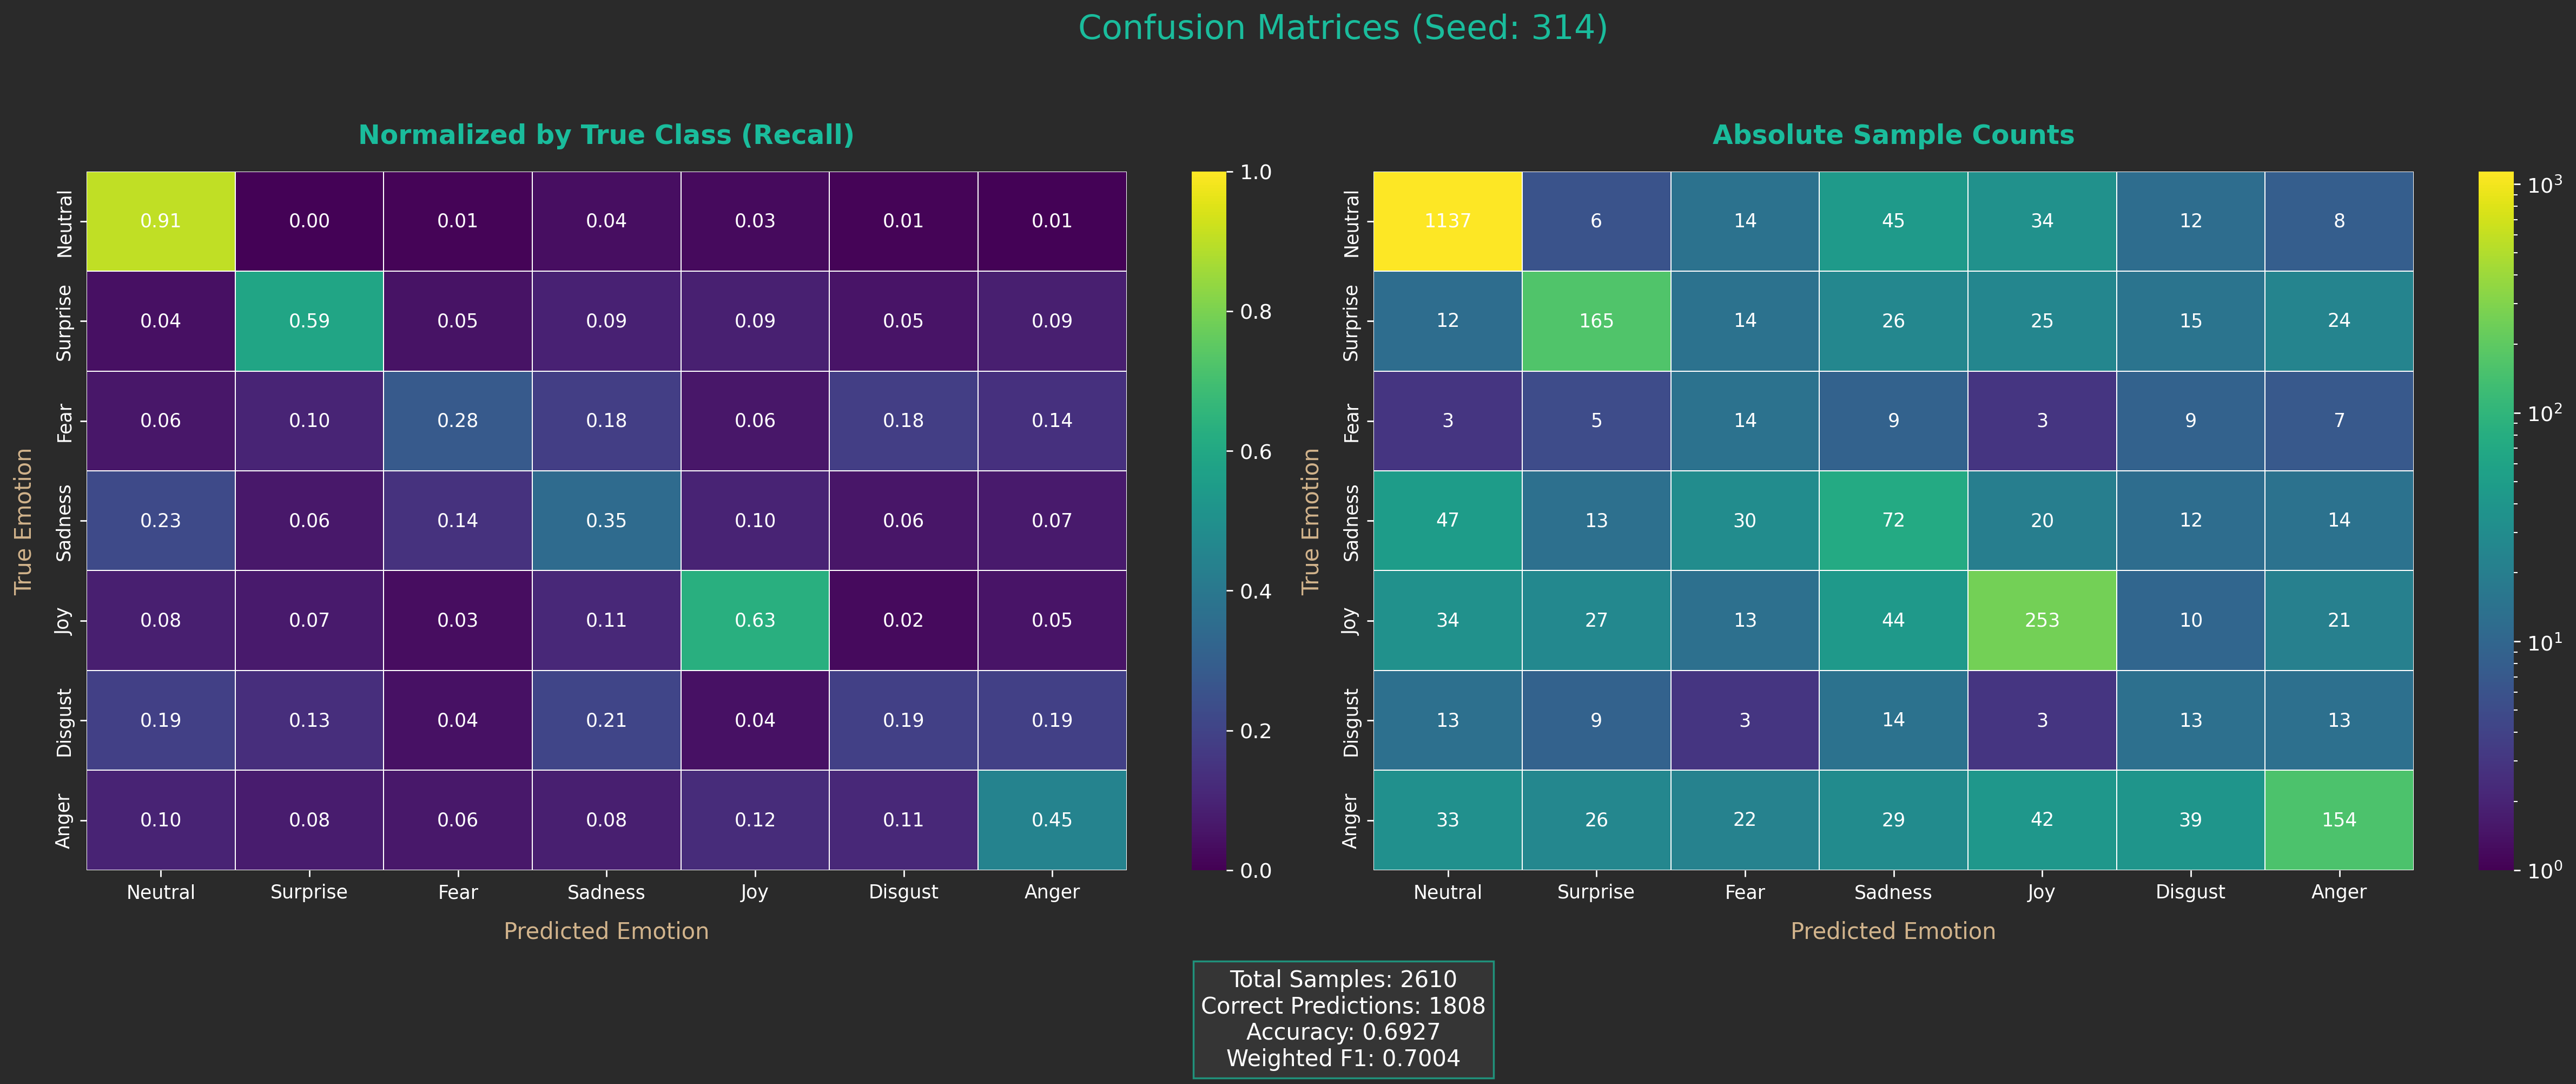

Saved confusion matrix to: confusion_matrix_seed_314.png

FINAL STATISTICAL REPORT ACROSS SEEDS
Test F1 Scores: [0.7068474326786847, 0.7111781423529839, 0.70961505345017, 0.7287393488704228, 0.7004316228755534]
Mean Weighted F1: 0.7114
Standard Deviation: 0.0094
95% Confidence Interval: ±0.0083
Range: 0.7004 - 0.7287


In [4]:
# import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, BatchNorm, global_mean_pool
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import os
import random
import time
import scipy.stats as st
import matplotlib as mpl
from sklearn.metrics import ConfusionMatrixDisplay
import json

# ========================================================================
# Enhanced Visualization Settings
# ========================================================================
BACKGROUND_COLOR = '#2A2A2A'
TEXT_COLOR = '#FFFFFF'
LABEL_COLOR = '#D2B48C'
TITLE_COLOR = "#1abc9c"

# Set global plotting parameters
plt.rcParams.update({
    'axes.facecolor': BACKGROUND_COLOR,
    'figure.facecolor': BACKGROUND_COLOR,
    'axes.edgecolor': TEXT_COLOR,
    'axes.labelcolor': LABEL_COLOR,
    'text.color': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'grid.color': '#4A4A4A',
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.titlecolor': TITLE_COLOR,
    'axes.labelsize': 12,
    'figure.dpi': 250,
    'figure.autolayout': True
})

# ========================================================================
# Enhanced seed setting for full reproducibility
# ========================================================================

def set_seed(seed=42):
    """Set all random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    
    # Critical for reproducibility
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.use_deterministic_algorithms(True)
    
    # Keep PYTHONHASHSEED setting
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed()

# ========================================================================
# Enhanced confusion matrix plotting functions
# ========================================================================
def plot_styled_confusion_matrix(y_true, y_pred, class_names, seed):
    # Convert to numpy arrays for element-wise operations
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    
    """Create and display styled confusion matrix heatmap"""
    # Create subplots for both normalized and absolute counts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor=BACKGROUND_COLOR)
    fig.suptitle(f'Confusion Matrices (Seed: {seed})', color=TITLE_COLOR, fontsize=18, y=0.98)
    
    # Plot normalized confusion matrix (recall)
    cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
    cm_norm_df = pd.DataFrame(cm_norm, index=class_names, columns=class_names)
    
    ax1.set_facecolor(BACKGROUND_COLOR)
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sns.heatmap(
        cm_norm_df, 
        annot=True, 
        fmt='.2f', 
        cmap='viridis',
        linewidths=0.5,
        annot_kws={'color': TEXT_COLOR, 'size': 10},
        norm=norm,
        ax=ax1
    )
    ax1.set_title('Normalized by True Class (Recall)', color=TITLE_COLOR, fontsize=14, pad=15)
    ax1.set_xlabel('Predicted Emotion', color=LABEL_COLOR, fontsize=12, labelpad=10)
    ax1.set_ylabel('True Emotion', color=LABEL_COLOR, fontsize=12, labelpad=10)
    ax1.tick_params(axis='both', colors=TEXT_COLOR, labelsize=10)
    
    # Plot absolute counts confusion matrix
    cm_abs = confusion_matrix(y_true, y_pred)
    cm_abs_df = pd.DataFrame(cm_abs, index=class_names, columns=class_names)
    
    ax2.set_facecolor(BACKGROUND_COLOR)
    # Use logarithmic normalization for better visualization of large count ranges
    norm_abs = mpl.colors.LogNorm(vmin=1, vmax=cm_abs.max()) if cm_abs.max() > 0 else None
    sns.heatmap(
        cm_abs_df, 
        annot=True, 
        fmt='d',  # Integer format
        cmap='viridis',
        linewidths=0.5,
        annot_kws={'color': TEXT_COLOR, 'size': 10},
        norm=norm_abs,
        ax=ax2
    )
    ax2.set_title('Absolute Sample Counts', color=TITLE_COLOR, fontsize=14, pad=15)
    ax2.set_xlabel('Predicted Emotion', color=LABEL_COLOR, fontsize=12, labelpad=10)
    ax2.set_ylabel('True Emotion', color=LABEL_COLOR, fontsize=12, labelpad=10)
    ax2.tick_params(axis='both', colors=TEXT_COLOR, labelsize=10)
    
    # Add colorbar for absolute counts
    cbar = ax2.collections[0].colorbar
    cbar.ax.tick_params(colors=TEXT_COLOR)
    
    # Add statistics box
    total_samples = len(y_true_np)
    
    correct = np.sum(y_true_np == y_pred_np)

    accuracy = accuracy_score(y_true, y_pred)
    stats_text = (
        f"Total Samples: {total_samples}\n"
        f"Correct Predictions: {correct}\n"
        f"Accuracy: {accuracy:.4f}\n"
        f"Weighted F1: {f1_score(y_true, y_pred, average='weighted'):.4f}"
    )
    
    fig.text(
        0.5, 0.05, 
        stats_text,
        ha='center', va='center',
        fontsize=12, color=TEXT_COLOR,
        bbox=dict(facecolor='#3A3A3A', alpha=0.7, edgecolor='#1abc9c')
    )
    
    # Save and display
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Make space for stats box
    save_path = f'confusion_matrix_seed_{seed}.png'
    plt.savefig(save_path, dpi=250, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Saved confusion matrix to: {save_path}")
    
    return save_path

# -------------------------------
# Enhanced Adaptive Focal Loss with Minority Penalty
# -------------------------------

class EnhancedAdaptiveFocalLoss(nn.Module):
    def __init__(self, gamma_base=3.0, class_counts=None, smoothing=0.15, 
                 alpha=0.8, beta=0.7, minority_classes=[2, 3, 5], penalty_factor=4.0):
        super().__init__()
        self.gamma_base = gamma_base
        self.smoothing = smoothing
        self.alpha = alpha
        self.beta = beta
        self.minority_classes = minority_classes
        self.penalty_factor = penalty_factor
        
        if class_counts is not None:
            weights = 1.0 / np.power(class_counts, 0.65)
            minority_mask = np.isin(np.arange(len(weights)), minority_classes)
            weights[minority_mask] *= (1 + self.beta)
            normalized_weights = weights / weights.sum() * len(class_counts)
            self.register_buffer('gamma_weights', torch.tensor(normalized_weights, dtype=torch.float32))
        else:
            self.register_buffer('gamma_weights', torch.ones(7))

    def forward(self, inputs, targets):
        confidence = 1.0 - self.smoothing
        log_probs = F.log_softmax(inputs, dim=-1)
        nll_loss = -log_probs.gather(dim=-1, index=targets.unsqueeze(1)).squeeze(1)
        smooth_loss = -log_probs.mean(dim=-1)
        loss = confidence * nll_loss + self.smoothing * smooth_loss
        
        pt = torch.exp(-loss)
        gamma_weights = self.gamma_weights.to(targets.device)
        gamma = gamma_weights[targets] * self.gamma_base
        focal_loss = (1 - pt) ** gamma * loss
        
        minority_mask = torch.isin(targets, torch.tensor(self.minority_classes).to(targets.device))
        minority_penalty = self.penalty_factor * minority_mask.float()
        focal_loss = focal_loss * (1 + minority_penalty)
        
        return focal_loss.mean()

# -------------------------------
# Advanced Graph Construction (Handles small graphs)
# -------------------------------

def build_dialogue_graph(dialogue_items, speaker_to_idx, dialogue_id):
    """Enhanced graph construction with semantic relationships"""
    utterances = sorted(
        [item for item in dialogue_items if any(k.endswith("_BiLSTM") for k in item)],
        key=lambda x: int(x['utt_id'])
    )
    
    # Handle cases with 0 utterances
    if len(utterances) == 0:
        return None
    
    node_features = []
    labels = []
    speaker_ids = []
    emotions = []
    
    for item in utterances:
        feature_key = next(k for k in item if k.endswith("_BiLSTM"))
        node_features.append(item[feature_key])
        labels.append(item['y'])
        speaker_ids.append(speaker_to_idx[item['speaker']])
        emotions.append(item['y'])
    
    num_nodes = len(node_features)
    edge_index = []
    edge_attr = []
    
    # Always add self-loops
    for i in range(num_nodes):
        edge_index.append([i, i])
        edge_attr.append([1, 0, 1])  # same_speaker=1, distance=0, emotion_same=1
    
    # Only add connections if >1 node
    if num_nodes > 1:
        # 1. Chronological connections with longer context
        for i in range(num_nodes):
            # Connect to next 3 utterances
            for offset in range(1, 4):
                j = i + offset
                if j < num_nodes:
                    edge_index.append([i, j])
                    edge_index.append([j, i])
                    same_speaker = int(speaker_ids[i] == speaker_ids[j])
                    emotion_same = int(emotions[i] == emotions[j])
                    distance = 1.0 / offset
                    edge_attr.append([same_speaker, distance, emotion_same])
                    edge_attr.append([same_speaker, distance, emotion_same])
        
        # 2. Speaker-based connections (long-range)
        speaker_history = defaultdict(list)
        for i, spk in enumerate(speaker_ids):
            if spk in speaker_history:
                prev_indices = sorted(speaker_history[spk])
                for j in prev_indices:
                    if abs(i - j) > 1:
                        edge_index.append([i, j])
                        edge_index.append([j, i])
                        distance = 1.0 / (abs(i - j) + 1e-5)
                        emotion_same = int(emotions[i] == emotions[j])
                        edge_attr.append([1, distance, emotion_same])
                        edge_attr.append([1, distance, emotion_same])
            speaker_history[spk].append(i)
        
        # 3. Emotion-based connections with threshold
        emotion_groups = defaultdict(list)
        for i, emo in enumerate(emotions):
            emotion_groups[emo].append(i)
        
        for emo in sorted(emotion_groups.keys()):
            indices = sorted(emotion_groups[emo])
            if len(indices) > 1:
                for idx in range(1, len(indices)):
                    i1, i2 = indices[idx-1], indices[idx]
                    if abs(i1 - i2) < 8:  # Increased connection window
                        edge_index.append([i1, i2])
                        edge_index.append([i2, i1])
                        distance = 1.0 / (abs(i1 - i2) + 1e-5)
                        edge_attr.append([0, distance, 1])
                        edge_attr.append([0, distance, 1])
        
        # 4. Cross-speaker reactions with lookback
        for i in range(1, num_nodes):
            # Connect to previous 2 speakers
            for lookback in range(1, 3):
                if i - lookback >= 0 and speaker_ids[i] != speaker_ids[i-lookback]:
                    edge_index.append([i, i-lookback])
                    edge_index.append([i-lookback, i])
                    emotion_same = int(emotions[i] == emotions[i-lookback])
                    edge_attr.append([0, 1.0/lookback, emotion_same])
                    edge_attr.append([0, 1.0/lookback, emotion_same])
    
    return Data(
        x=torch.tensor(node_features, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous(),
        edge_attr=torch.tensor(edge_attr, dtype=torch.float),
        y=torch.tensor(labels, dtype=torch.long),
        speaker_id=torch.tensor(speaker_ids, dtype=torch.long),
        dialogue_id=dialogue_id
    )

# -------------------------------
# Enhanced GNN Model with Regularization
# -------------------------------

class EnhancedEmotionGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_speakers, dropout=0.7, edge_dropout=0.2):
        super().__init__()
        self.edge_dropout = edge_dropout
        
        # Speaker embedding with higher dimension
        self.speaker_emb = nn.Embedding(num_speakers, 32)
        
        # Feature projection with LayerNorm
        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.GELU(),
            nn.LayerNorm(hidden_dim)
        )
        
        # Edge feature projection
        self.edge_proj = nn.Sequential(
            nn.Linear(3, 16),
            nn.GELU(),
            nn.LayerNorm(16)
        )
        
        # Graph attention layers with residual connections
        self.conv1 = GATConv(
            hidden_dim + 32, hidden_dim * 2,
            heads=4, edge_dim=16, dropout=dropout
        )
        self.res1 = nn.Linear(hidden_dim + 32, hidden_dim * 8)
        
        self.conv2 = GATConv(
            hidden_dim * 8, hidden_dim,
            heads=6, edge_dim=16, dropout=dropout
        )
        self.res2 = nn.Linear(hidden_dim * 8, hidden_dim * 6)
        
        self.conv3 = GATConv(
            hidden_dim * 6, hidden_dim,
            heads=4, concat=False, edge_dim=16, dropout=dropout
        )
        
        # Auxiliary classifier with deeper architecture
        self.aux_classifier = nn.Sequential(
            nn.Linear(hidden_dim * 6, hidden_dim * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim * 2, output_dim)
        )
        
        # Emotion context module with attention
        self.emotion_att = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )
        
        # Main classifier with LayerNorm
        self.main_classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, data):
        # Project node features
        x = self.input_proj(data.x)
        
        # Add speaker embeddings
        spk_emb = self.speaker_emb(data.speaker_id)
        x_base = torch.cat([x, spk_emb], dim=1)
        x = x_base
        
        # Project edge features
        edge_attr = self.edge_proj(data.edge_attr)
        edge_index = data.edge_index
        
        # Apply edge dropout during training
        if self.training and self.edge_dropout > 0:
            mask = torch.rand(edge_index.size(1), device=edge_index.device) > self.edge_dropout
            edge_index = edge_index[:, mask]
            edge_attr = edge_attr[mask]
        
        # Graph convolutions with residual connections
        x1 = F.gelu(self.conv1(x, edge_index, edge_attr))
        x1 = x1 + self.res1(x)  # Residual connection
        
        x2 = F.gelu(self.conv2(x1, edge_index, edge_attr))
        x2 = x2 + self.res2(x1)  # Residual connection
        
        x3 = F.gelu(self.conv3(x2, edge_index, edge_attr))
        
        # Auxiliary output from intermediate layer
        aux_out = self.aux_classifier(x2)
        
        # Emotion context pooling
        att_scores = self.emotion_att(x3)
        att_weights = F.softmax(att_scores, dim=0)
        context = torch.sum(att_weights * x3, dim=0, keepdim=True)
        
        # Combine with node features
        context = context.expand(x3.size(0), -1)
        x_final = torch.cat([x3, context], dim=1)
        
        # Final classification
        main_out = self.main_classifier(x_final)
        
        return main_out, aux_out

# -------------------------------
# Data Preparation and Training with Multi-Seed Evaluation
# -------------------------------

def main():
    # Use multiple seeds for robust evaluation
    seeds = [42, 2023, 7, 123, 314]  # Different random seeds
    all_test_results = []
    
    # Emotion label mapping for plots
    label_map = {
        0: 'Neutral',
        1: 'Surprise',
        2: 'Fear',
        3: 'Sadness',
        4: 'Joy',
        5: 'Disgust',
        6: 'Anger'
    }
    class_names = [label_map[i] for i in range(7)]
    
    for seed_idx, seed in enumerate(seeds):
        set_seed(seed)
        print("="*80)
        print(f"ENHANCED EMOTION CLASSIFICATION (Seed {seed_idx+1}/{len(seeds)})")
        print("="*80)
        
        # Load data
        print("\nLoading data...")
        with open("/kaggle/input/extracted-features/Enhanced_Features_with_BiLSTM.json", "r") as f:
            data = json.load(f)
        
        # Compute class weights
        print("Computing class weights...")
        all_labels = []
        for split in ['train', 'dev', 'test']:
            for item in data[split]:
                if any(k.endswith("_BiLSTM") for k in item):
                    all_labels.append(item['y'])
        
        class_counts = np.bincount(all_labels, minlength=7)
        class_weights = compute_class_weight('balanced', classes=np.arange(7), y=all_labels)
        class_weights = torch.tensor(class_weights, dtype=torch.float32)
        print("Class distribution:", class_counts)
        print("Class weights:", class_weights)
        
        # Create speaker mapping
        print("\nCreating speaker mapping...")
        all_speakers = set()
        for split in ['train', 'dev', 'test']:
            for item in data[split]:
                all_speakers.add(item['speaker'])
        speaker_to_idx = {speaker: idx for idx, speaker in enumerate(sorted(all_speakers))}
        print(f"Found {len(speaker_to_idx)} unique speakers")
        
        # Build graphs with enhanced minority oversampling
        print("\nBuilding graphs with enhanced minority oversampling...")
        
        train_dialogues = defaultdict(list)
        for item in data['train']:
            if any(k.endswith("_BiLSTM") for k in item):
                train_dialogues[item['dialogue_id']].append(item)
        
        dev_dialogues = defaultdict(list)
        for item in data['dev']:
            if any(k.endswith("_BiLSTM") for k in item):
                dev_dialogues[item['dialogue_id']].append(item)
        
        test_dialogues = defaultdict(list)
        for item in data['test']:
            if any(k.endswith("_BiLSTM") for k in item):
                test_dialogues[item['dialogue_id']].append(item)
        
        # Build graphs with feature perturbation for minority classes
        train_graphs = []
        minority_classes = [2, 3, 5]  # Fear, Sadness, Disgust
        
        def perturb_features(features, scale=0.08):
            """Add Gaussian noise to features"""
            noise = torch.randn_like(features) * scale
            return features + noise

        for dial_id in sorted(train_dialogues.keys()):
            items = train_dialogues[dial_id]
            graph = build_dialogue_graph(items, speaker_to_idx, dial_id)
            if graph is None:
                continue
                
            train_graphs.append(graph)
            
            # Enhanced oversampling: base + intensity-based + feature augmentation
            minority_count = sum(1 for item in items if item['y'] in minority_classes)
            oversample_factor = min(6, 1 + minority_count * 2)  # Increased oversampling
            for _ in range(oversample_factor):
                dup_graph = build_dialogue_graph(items, speaker_to_idx, dial_id)
                if dup_graph is None:
                    continue
                    
                # Feature perturbation for minority utterances
                minority_mask = torch.isin(dup_graph.y, torch.tensor(minority_classes))
                if minority_mask.any():
                    dup_graph.x[minority_mask] = perturb_features(dup_graph.x[minority_mask], scale=0.1)
                    
                train_graphs.append(dup_graph)
        
        dev_graphs = []
        for dial_id in sorted(dev_dialogues.keys()):
            items = dev_dialogues[dial_id]
            graph = build_dialogue_graph(items, speaker_to_idx, dial_id)
            if graph is not None:
                dev_graphs.append(graph)
        
        test_graphs = []
        for dial_id in sorted(test_dialogues.keys()):
            items = test_dialogues[dial_id]
            graph = build_dialogue_graph(items, speaker_to_idx, dial_id)
            if graph is not None:
                test_graphs.append(graph)
        
        # Debug graph info
        print(f"\nGraph Statistics:")
        print(f"Train graphs: {len(train_graphs)} (with enhanced oversampling)")
        print(f"Dev graphs: {len(dev_graphs)}")
        print(f"Test graphs: {len(test_graphs)}")
        
        # Deterministic data generators
        def worker_init_fn(worker_id):
            worker_seed = torch.initial_seed() % 2**32
            np.random.seed(worker_seed)
            random.seed(worker_seed)
        
        # Create data loaders with batch size 32 (optimal)
        train_loader = DataLoader(
            train_graphs, 
            batch_size=16, 
            shuffle=True,
            worker_init_fn=worker_init_fn,
            generator=torch.Generator().manual_seed(seed)
        )
        dev_loader = DataLoader(
            dev_graphs, 
            batch_size=16, 
            shuffle=False,
            worker_init_fn=worker_init_fn,
            generator=torch.Generator().manual_seed(seed)
        )
        test_loader = DataLoader(
            test_graphs, 
            batch_size=16, 
            shuffle=False,
            worker_init_fn=worker_init_fn,
            generator=torch.Generator().manual_seed(seed)
        )
        
        # Initialize model
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        input_dim = len(train_graphs[0].x[0])
        
        model = EnhancedEmotionGNN(
            input_dim=input_dim,
            hidden_dim=128,  # Reduced hidden dimension to prevent overfitting
            output_dim=7,
            num_speakers=len(speaker_to_idx),
            dropout=0.7,  # Increased dropout
            edge_dropout=0.2  # Edge regularization
        ).to(device)
        
        print(f"\nModel initialized (Seed {seed}):")
        print(f"Input dimension: {input_dim}")
        print(f"Hidden dimension: 128")
        print(f"Number of speakers: {len(speaker_to_idx)}")
        print(f"Device: {device}")
        
        # Enhanced loss function
        criterion = EnhancedAdaptiveFocalLoss(
            gamma_base=3.0,
            class_counts=class_counts,
            smoothing=0.15,
            alpha=0.8,
            beta=0.7,
            minority_classes=[2, 3, 5],
            penalty_factor=4.0
        ).to(device)
        
        # Optimizer with weight decay and gradient clipping
        optimizer = optim.AdamW(
            model.parameters(),
            lr=5e-5,  # Reduced learning rate
            weight_decay=1e-3  # Increased weight decay
        )
        
        # Learning rate scheduler with warmup
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='max', factor=0.75, patience=4, verbose=True
        )
        
        # Training loop
        print("\n" + "="*50)
        print("STARTING TRAINING")
        print("="*50)
        
        best_val_f1 = 0
        early_stop_counter = 0
        patience = 10  # Reduced patience
        
        # Gradient accumulation steps (effective batch size = 32 * 2 = 64)
        accumulation_steps = 2
        warmup_epochs = 3
        
        for epoch in range(60):  # Reduced max epochs
            start_time = time.time()
            model.train()
            train_preds, train_labels = [], []
            total_loss = 0
            optimizer.zero_grad()
            
            # Learning rate warmup
            if epoch < warmup_epochs:
                lr_scale = min(1.0, float(epoch + 1) / warmup_epochs)
                for pg in optimizer.param_groups:
                    pg['lr'] = lr_scale * 5e-5
            
            for i, data in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/60")):
                data = data.to(device)
                main_out, aux_out = model(data)
                
                mask = data.y != -100
                if mask.sum() == 0:
                    continue
                    
                loss_main = criterion(main_out[mask], data.y[mask])
                loss_aux = criterion(aux_out[mask], data.y[mask])
                loss = 0.9 * loss_main + 0.1 * loss_aux  # Reduced auxiliary weight
                loss = loss / accumulation_steps  # Scale loss
                
                loss.backward()
                
                if (i + 1) % accumulation_steps == 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)  # Stricter clipping
                    optimizer.step()
                    optimizer.zero_grad()
                
                total_loss += loss.item() * accumulation_steps
                preds = main_out.argmax(dim=1)[mask]
                train_preds.extend(preds.cpu().tolist())
                train_labels.extend(data.y[mask].cpu().tolist())
            
            # Handle remaining gradients
            if len(train_loader) % accumulation_steps != 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
                optimizer.step()
                optimizer.zero_grad()
            
            if len(train_labels) == 0:
                train_f1 = 0
                train_acc = 0
            else:
                train_f1 = f1_score(train_labels, train_preds, average='weighted')
                train_acc = accuracy_score(train_labels, train_preds)
            
            # Validation
            model.eval()
            val_preds, val_labels = [], []
            val_loss = 0.0
            
            with torch.no_grad():
                for data in dev_loader:
                    data = data.to(device)
                    main_out, aux_out = model(data)
                    
                    mask = data.y != -100
                    if mask.sum() == 0:
                        continue
                        
                    loss_main = criterion(main_out[mask], data.y[mask])
                    loss_aux = criterion(aux_out[mask], data.y[mask])
                    loss = 0.9 * loss_main + 0.1 * loss_aux
                    val_loss += loss.item()
                    
                    preds = main_out.argmax(dim=1)[mask]
                    val_preds.extend(preds.cpu().tolist())
                    val_labels.extend(data.y[mask].cpu().tolist())
                    
            if len(dev_loader) == 0 or len(val_labels) == 0:
                val_loss_avg = 0
                val_f1 = 0
                val_acc = 0
            else:
                val_loss_avg = val_loss / len(dev_loader)
                val_f1 = f1_score(val_labels, val_preds, average='weighted')
                val_acc = accuracy_score(val_labels, val_preds)
            
            # Update scheduler
            scheduler.step(val_f1)
            
            # Early stopping check
            if val_f1 > best_val_f1:
                best_val_f1 = val_f1
                torch.save(model.state_dict(), f"best_emotion_gnn_seed{seed}.pth")
                print(f"\nSaved new best model at epoch {epoch+1} with Val F1: {val_f1:.4f}")
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print(f"\nEarly stopping at epoch {epoch+1} as validation F1 didn't improve for {patience} epochs")
                    break
            
            epoch_time = time.time() - start_time
            print(f"\nEpoch {epoch+1} Summary ({epoch_time:.1f}s):")
            print(f"Train Loss: {total_loss/len(train_loader):.4f} | Acc: {train_acc:.4f} | F1: {train_f1:.4f}")
            print(f"Val Loss:   {val_loss_avg:.4f} | Acc: {val_acc:.4f} | F1: {val_f1:.4f}")
            print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
        
        # Final evaluation for this seed
        print("\n" + "="*50)
        print(f"FINAL EVALUATION (Seed {seed})")
        print("="*50)
        
        model.load_state_dict(torch.load(f"best_emotion_gnn_seed{seed}.pth"))
        model.eval()
        test_preds, test_labels = [], []
        
        with torch.no_grad():
            for data in tqdm(test_loader, desc="Testing"):
                data = data.to(device)
                main_out, _ = model(data)
                
                mask = data.y != -100
                if mask.sum() == 0:
                    continue
                    
                preds = main_out.argmax(dim=1)[mask]
                test_preds.extend(preds.cpu().tolist())
                test_labels.extend(data.y[mask].cpu().tolist())
        
        # Generate report
        test_f1 = f1_score(test_labels, test_preds, average='weighted')
        test_acc = accuracy_score(test_labels, test_preds)
        macro_f1 = f1_score(test_labels, test_preds, average='macro')
        
        all_test_results.append(test_f1)
        
        print("\nOverall Test Performance:")
        print(f"Accuracy: {test_acc:.4f}")
        print(f"Weighted F1: {test_f1:.4f}")
        print(f"Macro F1: {macro_f1:.4f} (Minority Focus)")
        
        # Per-class performance
        print("\nPer-Class Performance:")
        class_report = classification_report(test_labels, test_preds, digits=4, output_dict=True)
        for i in range(7):
            emotion = label_map[i]
            precision = class_report[str(i)]['precision']
            recall = class_report[str(i)]['recall']
            f1 = class_report[str(i)]['f1-score']
            support = class_report[str(i)]['support']
            print(f"{emotion:<9} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Support: {support}")
        
        print("\nClassification Report:")
        print(classification_report(test_labels, test_preds, digits=4))
        
        # Generate styled confusion matrix with absolute counts
        plot_styled_confusion_matrix(test_labels, test_preds, class_names, seed)
    
    # Statistical reporting across seeds
    print("\n" + "="*80)
    print("FINAL STATISTICAL REPORT ACROSS SEEDS")
    print("="*80)
    mean_f1 = np.mean(all_test_results)
    std_f1 = np.std(all_test_results)
    ci = 1.96 * std_f1 / np.sqrt(len(seeds))  # 95% confidence interval
    
    print(f"Test F1 Scores: {all_test_results}")
    print(f"Mean Weighted F1: {mean_f1:.4f}")
    print(f"Standard Deviation: {std_f1:.4f}")
    print(f"95% Confidence Interval: ±{ci:.4f}")
    print(f"Range: {min(all_test_results):.4f} - {max(all_test_results):.4f}")

if __name__ == "__main__":
    main()